In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans


In [64]:
df= pd.read_csv("E:\customer_chrun.csv")
df.head()

,columns1,columns2,columns3,columns4,columns5,columns6,columns7,columns8,columns9,columns10,...,columns12,columns13,columns14,columns15,columns16,columns17,columns18,columns19,columns20,columns21
0,KS,128,415,382-4657,no,yes,25,265.10,110,45.07,...,99,16.78,244.70,91,11.01,10.00,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.60,123,27.47,...,103,16.62,254.40,103,11.45,13.70,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.40,114,41.38,...,110,10.30,162.60,104,7.32,12.20,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.40,71,50.90,...,88,5.26,196.90,89,8.86,6.60,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.70,113,28.34,...,122,12.61,186.90,121,8.41,10.10,3,2.73,3,False.


In [65]:
df.shape

(4617, 21)

In [66]:
#removing the unwanted column 
df = df.drop(['columns4'], axis=1)


In [67]:
# Define the new column names
new_columns = [
    "State",
    "Account Length",
    "Area Code",
    "International Plan",
    "VMail Plan",
    "VMail Message",
    "Day Mins",
    "Day Calls",
    "Day Charge",
    "Eve Mins",
    "Eve Calls",
    "Eve Charge",
    "Night Mins",
    "Night Calls",
    "Night Charge",
    "International Mins",
    "International Calls",
    "International Charge",
    "CustServ Calls",
    "Churn"
]

# Replace the column names
df.columns = new_columns


In [68]:
df.head()

,State,Account Length,Area Code,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International Calls,International Charge,CustServ Calls,Churn
0,KS,128,415,no,yes,25,265.10,110,45.07,197.40,99,16.78,244.70,91,11.01,10.00,3,2.70,1,False.
1,OH,107,415,no,yes,26,161.60,123,27.47,195.50,103,16.62,254.40,103,11.45,13.70,3,3.70,1,False.
2,NJ,137,415,no,no,0,243.40,114,41.38,121.20,110,10.30,162.60,104,7.32,12.20,5,3.29,0,False.
3,OH,84,408,yes,no,0,299.40,71,50.90,61.90,88,5.26,196.90,89,8.86,6.60,7,1.78,2,False.
4,OK,75,415,yes,no,0,166.70,113,28.34,148.30,122,12.61,186.90,121,8.41,10.10,3,2.73,3,False.


In [69]:
df=df.drop_duplicates()
df.shape

(4617, 20)

In [70]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


NO duplicates where found so nothing was removed

In [71]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}': {unique_values}") 

Unique values in column 'State': ['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']
Unique values in column 'Account Length': [128 107 137  84  75 118 121 147 117 141  65  74 168  95  62 161  85  93
  76  73  77 130 111 132 174  57  54  20  49 142 172  12  72  36  78 136
 149  98 135  34 160  64  59 119  97  52  60  10  96  87  81  68 125 116
  38  40  43 113 126 150 138 162  90  50  82 144  46  70  55 106  94 155
  80 104  99 120 108 122 157 103  63 112  41 193  61  92 131 163  91 127
 110 140  83 145  56 151 139   6 115 146 185 148  32  25 179  67  19 170
 164  51 208  53 105  66  86  35  88 123  45 100 215  22  33 114  24 101
 143  48  71 167  89 199 166 158 196 209  16  39 173 129  44  79  31 124
  37 159 194 154  21 133 224  58  11 109 102 165  18  30 176  47 190 152
  26  69

In [72]:
# # Function to extract numeric digits
# def extract_numbers(text):
#   return re.sub(r'\D', '', text)

# # Apply the function to the 'Phone' column
# df['Phone']=df['Phone'].apply(extract_numbers)
# print(df)


In [73]:
df.head

<bound method NDFrame.head of      State  Account Length  Area Code International Plan VMail Plan  \
0       KS             128        415                 no        yes   
1       OH             107        415                 no        yes   
2       NJ             137        415                 no         no   
3       OH              84        408                yes         no   
4       OK              75        415                yes         no   
...    ...             ...        ...                ...        ...   
4612    NY              57        510                 no        yes   
4613    NM             177        408                 no        yes   
4614    VT              67        408                 no        yes   
4615    MI              98        415                 no        yes   
4616    IN             140        415                 no         no   

      VMail Message  Day Mins  Day Calls  Day Charge  Eve Mins  Eve Calls  \
0                25    265.10        110

In [74]:
column = df.columns 
for i in column:
    print(df.dtypes[i])

object
int64
int64
object
object
int64
float64
int64
float64
float64
int64
float64
float64
int64
float64
float64
int64
float64
int64
object


In [75]:
#Checking for null values
df.isnull().sum()

State                   0
Account Length          0
Area Code               0
International Plan      0
VMail Plan              0
VMail Message           0
Day Mins                0
Day Calls               0
Day Charge              0
Eve Mins                0
Eve Calls               0
Eve Charge              0
Night Mins              0
Night Calls             0
Night Charge            0
International Mins      0
International Calls     0
International Charge    0
CustServ Calls          0
Churn                   0
dtype: int64

In [76]:
data=df.copy()

In [77]:
pd.set_option('display.float_format', lambda x: '%.2f' %x)

In [78]:
df

,State,Account Length,Area Code,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International Calls,International Charge,CustServ Calls,Churn
0,KS,128,415,no,yes,25,265.10,110,45.07,197.40,99,16.78,244.70,91,11.01,10.00,3,2.70,1,False.
1,OH,107,415,no,yes,26,161.60,123,27.47,195.50,103,16.62,254.40,103,11.45,13.70,3,3.70,1,False.
2,NJ,137,415,no,no,0,243.40,114,41.38,121.20,110,10.30,162.60,104,7.32,12.20,5,3.29,0,False.
3,OH,84,408,yes,no,0,299.40,71,50.90,61.90,88,5.26,196.90,89,8.86,6.60,7,1.78,2,False.
4,OK,75,415,yes,no,0,166.70,113,28.34,148.30,122,12.61,186.90,121,8.41,10.10,3,2.73,3,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4612,NY,57,510,no,yes,25,144.00,81,24.48,187.20,112,15.91,158.60,122,7.14,8.50,6,2.30,3,False.
4613,NM,177,408,no,yes,29,189.00,91,32.13,303.10,96,25.76,163.60,116,7.36,15.70,1,4.24,3,False.
4614,VT,67,408,no,yes,33,127.50,126,21.68,296.10,129,25.17,200.90,91,9.04,13.00,3,3.51,1,False.
4615,MI,98,415,no,yes,23,168.90,98,28.71,226.30,117,19.24,165.50,96,7.45,14.30,3,3.86,0,False.


# EDA

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   State                 4617 non-null   object 
 1   Account Length        4617 non-null   int64  
 2   Area Code             4617 non-null   int64  
 3   International Plan    4617 non-null   object 
 4   VMail Plan            4617 non-null   object 
 5   VMail Message         4617 non-null   int64  
 6   Day Mins              4617 non-null   float64
 7   Day Calls             4617 non-null   int64  
 8   Day Charge            4617 non-null   float64
 9   Eve Mins              4617 non-null   float64
 10  Eve Calls             4617 non-null   int64  
 11  Eve Charge            4617 non-null   float64
 12  Night Mins            4617 non-null   float64
 13  Night Calls           4617 non-null   int64  
 14  Night Charge          4617 non-null   float64
 15  International Mins   

In [80]:
data.describe()

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International Calls,International Charge,CustServ Calls
count,4617.00,4617.00,4617.00,4617.00,4617.00,4617.00,4617.00,4617.00,4617.00,4617.00,4617.00,4617.00,4617.00,4617.00,4617.00,4617.00
mean,100.65,437.05,7.85,180.45,100.05,30.68,200.43,100.18,17.04,200.62,99.94,9.03,10.28,4.43,2.78,1.57
std,39.60,42.29,13.59,53.98,19.88,9.18,50.56,19.82,4.30,50.54,19.94,2.27,2.76,2.46,0.74,1.31
min,1.00,408.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,23.20,12.00,1.04,0.00,0.00,0.00,0.00
25%,74.00,408.00,0.00,143.70,87.00,24.43,165.90,87.00,14.10,167.10,87.00,7.52,8.60,3.00,2.32,1.00
50%,100.00,415.00,0.00,180.00,100.00,30.60,200.80,101.00,17.07,200.80,100.00,9.04,10.30,4.00,2.78,1.00
75%,127.00,510.00,17.00,216.80,113.00,36.86,234.00,114.00,19.89,234.90,113.00,10.57,12.10,6.00,3.27,2.00
max,243.00,510.00,51.00,351.50,165.00,59.76,363.70,170.00,30.91,395.00,175.00,17.77,20.00,20.00,5.40,9.00


In [81]:
data.isnull().sum()

State                   0
Account Length          0
Area Code               0
International Plan      0
VMail Plan              0
VMail Message           0
Day Mins                0
Day Calls               0
Day Charge              0
Eve Mins                0
Eve Calls               0
Eve Charge              0
Night Mins              0
Night Calls             0
Night Charge            0
International Mins      0
International Calls     0
International Charge    0
CustServ Calls          0
Churn                   0
dtype: int64

In [82]:
data.nunique()

State                     51
Account Length           218
Area Code                  3
International Plan         2
VMail Plan                 2
VMail Message             47
Day Mins                1901
Day Calls                123
Day Charge              1901
Eve Mins                1833
Eve Calls                125
Eve Charge              1621
Night Mins              1813
Night Calls              130
Night Charge            1012
International Mins       168
International Calls       21
International Charge     168
CustServ Calls            10
Churn                      2
dtype: int64

In [83]:
data.corr(numeric_only=True)

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International Calls,International Charge,CustServ Calls
Account Length,1.00,-0.02,-0.01,0.00,0.03,0.00,-0.01,0.02,-0.01,-0.00,-0.01,-0.00,0.00,0.02,0.00,0.00
Area Code,-0.02,1.00,-0.00,-0.02,-0.01,-0.02,0.01,-0.01,0.01,0.00,0.02,0.00,-0.01,-0.01,-0.01,0.02
VMail Message,-0.01,-0.00,1.00,0.01,-0.00,0.01,0.02,-0.01,0.02,0.00,0.00,0.00,0.01,0.01,0.01,-0.01
Day Mins,0.00,-0.02,0.01,1.00,-0.00,1.00,-0.01,0.01,-0.01,0.01,0.01,0.01,-0.01,0.00,-0.01,-0.01
Day Calls,0.03,-0.01,-0.00,-0.00,1.00,-0.00,-0.01,0.00,-0.01,0.01,-0.01,0.01,0.01,0.01,0.01,-0.01
Day Charge,0.00,-0.02,0.01,1.00,-0.00,1.00,-0.01,0.01,-0.01,0.01,0.01,0.01,-0.01,0.00,-0.01,-0.01
Eve Mins,-0.01,0.01,0.02,-0.01,-0.01,-0.01,1.00,0.00,1.00,-0.02,0.01,-0.02,0.00,0.01,0.00,-0.02
Eve Calls,0.02,-0.01,-0.01,0.01,0.00,0.01,0.00,1.00,0.00,0.00,-0.02,0.00,-0.00,0.01,-0.00,0.01
Eve Charge,-0.01,0.01,0.02,-0.01,-0.01,-0.01,1.00,0.00,1.00,-0.02,0.01,-0.02,0.00,0.01,0.00,-0.02
Night Mins,-0.00,0.00,0.00,0.01,0.01,0.01,-0.02,0.00,-0.02,1.00,0.03,1.00,-0.00,-0.01,-0.00,-0.01


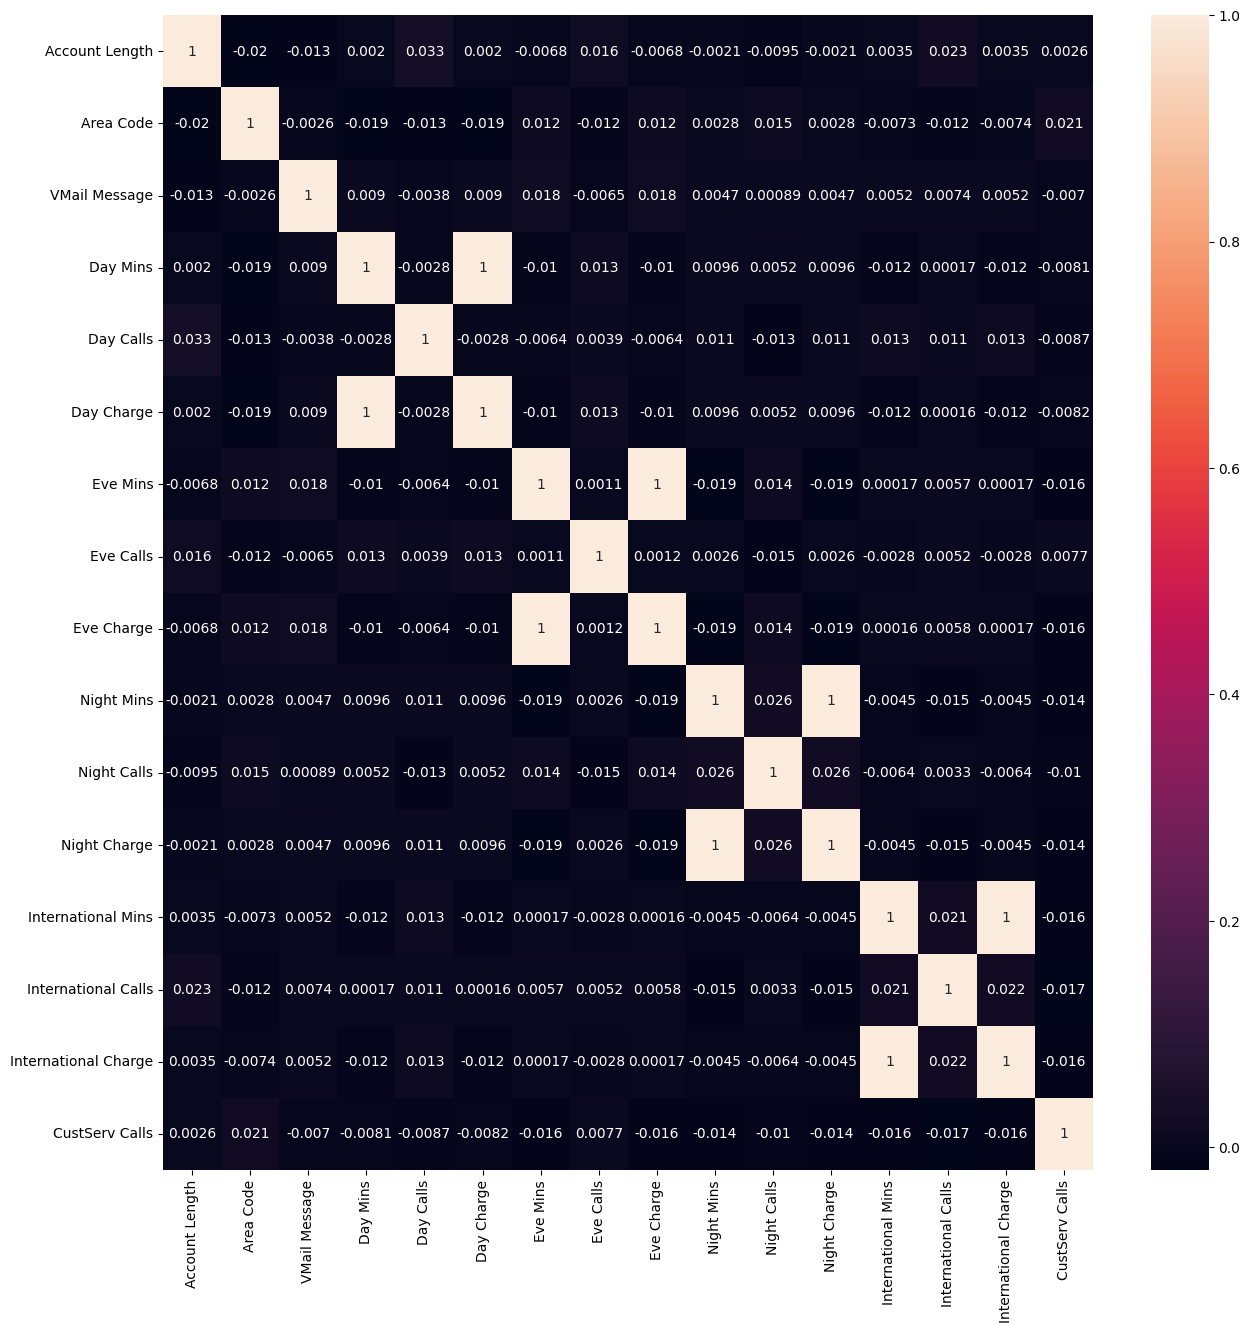

In [84]:
sns.heatmap(data.corr(numeric_only=True),annot=True)
plt.rcParams['figure.figsize']=(15,15)
plt.show()

In [85]:
print(data.describe(include='all'))  # Summary of numeric and categorical data


       State  Account Length  Area Code International Plan VMail Plan  \
count   4617         4617.00    4617.00               4617       4617   
unique    51             NaN        NaN                  2          2   
top       WV             NaN        NaN                 no         no   
freq     149             NaN        NaN               4171       3381   
mean     NaN          100.65     437.05                NaN        NaN   
std      NaN           39.60      42.29                NaN        NaN   
min      NaN            1.00     408.00                NaN        NaN   
25%      NaN           74.00     408.00                NaN        NaN   
50%      NaN          100.00     415.00                NaN        NaN   
75%      NaN          127.00     510.00                NaN        NaN   
max      NaN          243.00     510.00                NaN        NaN   

        VMail Message  Day Mins  Day Calls  Day Charge  Eve Mins  Eve Calls  \
count         4617.00   4617.00    4617.00  

In [86]:
data['State'] = data['State'].str.strip()  # Remove leading/trailing spaces


In [87]:
data['International Plan'] = data['International Plan'].str.replace(r'[,.:;]', '', regex=True).str.strip()
data['VMail Plan'] = data['VMail Plan'].str.replace(r'[,.:;]', '', regex=True).str.strip()
data['State'] = data['State'].str.replace(r'[,.:;]', '', regex=True).str.strip()

1. For Binary Columns:
Columns like 'International Plan' and 'VMail Plan' (e.g., 'Yes' and 'No'):
Use Label Encoding:

In [88]:
# Apply Label Encoding
for col in ['International Plan', 'VMail Plan']:
    data[col] = LabelEncoder().fit_transform(data[col])

2. For Multi-Class Columns with No Ordinal Relationship:
Columns like 'State' (e.g., 'NY', 'CA', 'TX'):
Use Frequency Encoding


In [89]:
# Frequency Encoding
for col in ['State']:
    freq = data[col].value_counts() / len(data)
    data[col] = data[col].map(freq)

3. For High-Cardinality Columns:
If a column like 'Phone' or 'State' has many unique values:
Prefering Frequency Encoding to prevent complexity.
Why These Methods Suit me?

Label Encoding:

Fits columns like 'International Plan' and 'VMail Plan' that are binary.
Simple, avoids data expansion, and ensures no increase in column count.

Frequency Encoding:

Encodes the significance of categories based on their occurrence.
Fits high-cardinality columns like 'State' without increasing the column count.

In [90]:
data.head(20)

,State,Account Length,Area Code,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International Calls,International Charge,CustServ Calls,Churn
0,0.02,128,415,0,1,25,265.10,110,45.07,197.40,99,16.78,244.70,91,11.01,10.00,3,2.70,1,False.
1,0.02,107,415,0,1,26,161.60,123,27.47,195.50,103,16.62,254.40,103,11.45,13.70,3,3.70,1,False.
2,0.02,137,415,0,0,0,243.40,114,41.38,121.20,110,10.30,162.60,104,7.32,12.20,5,3.29,0,False.
3,0.02,84,408,1,0,0,299.40,71,50.90,61.90,88,5.26,196.90,89,8.86,6.60,7,1.78,2,False.
4,0.02,75,415,1,0,0,166.70,113,28.34,148.30,122,12.61,186.90,121,8.41,10.10,3,2.73,3,False.
5,0.02,118,510,1,0,0,223.40,98,37.98,220.60,101,18.75,203.90,118,9.18,6.30,6,1.70,0,False.
6,0.02,121,510,0,1,24,218.20,88,37.09,348.50,108,29.62,212.60,118,9.57,7.50,7,2.03,3,False.
7,0.02,147,415,1,0,0,157.00,79,26.69,103.10,94,8.76,211.80,96,9.53,7.10,6,1.92,0,False.
8,0.02,117,408,0,0,0,184.50,97,31.37,351.60,80,29.89,215.80,90,9.71,8.70,4,2.35,1,False.
9,0.03,141,415,1,1,37,258.60,84,43.96,222.00,111,18.87,326.40,97,14.69,11.20,5,3.02,0,False.


In [91]:
data.tail(20)

,State,Account Length,Area Code,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International Calls,International Charge,CustServ Calls,Churn
4597,0.02,65,408,1,0,0,54.80,74,9.32,239.80,93,20.38,214.40,91,9.65,13.40,5,3.62,1,True.
4598,0.02,57,415,0,1,24,140.20,102,23.83,170.10,107,14.46,143.70,102,6.47,14.00,1,3.78,1,False.
4599,0.02,127,408,0,0,0,271.20,110,46.10,213.50,80,18.15,201.80,102,9.08,13.20,4,3.56,0,True.
4600,0.01,121,415,0,0,0,180.00,116,30.60,196.40,112,16.69,280.30,95,12.61,10.10,5,2.73,2,False.
4601,0.02,117,415,0,0,0,189.80,122,32.27,235.60,94,20.03,270.80,120,12.19,12.70,2,3.43,1,False.
4602,0.02,37,408,0,0,0,257.30,117,43.74,134.50,92,11.43,306.20,102,13.78,8.20,5,2.21,3,False.
4603,0.02,162,510,0,0,0,103.30,93,17.56,210.60,87,17.90,187.20,118,8.42,11.40,6,3.08,1,False.
4604,0.02,193,415,0,0,0,208.10,115,35.38,178.00,104,15.13,195.90,95,8.82,12.40,9,3.35,3,False.
4605,0.02,80,415,0,0,0,195.10,65,33.17,214.00,80,18.19,124.40,96,5.60,9.20,6,2.48,2,False.
4606,0.03,176,415,0,0,0,162.60,97,27.64,227.80,107,19.36,218.80,92,9.85,11.30,4,3.05,1,False.


In [92]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}': {unique_values}") 

Unique values in column 'State': ['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']
Unique values in column 'Account Length': [128 107 137  84  75 118 121 147 117 141  65  74 168  95  62 161  85  93
  76  73  77 130 111 132 174  57  54  20  49 142 172  12  72  36  78 136
 149  98 135  34 160  64  59 119  97  52  60  10  96  87  81  68 125 116
  38  40  43 113 126 150 138 162  90  50  82 144  46  70  55 106  94 155
  80 104  99 120 108 122 157 103  63 112  41 193  61  92 131 163  91 127
 110 140  83 145  56 151 139   6 115 146 185 148  32  25 179  67  19 170
 164  51 208  53 105  66  86  35  88 123  45 100 215  22  33 114  24 101
 143  48  71 167  89 199 166 158 196 209  16  39 173 129  44  79  31 124
  37 159 194 154  21 133 224  58  11 109 102 165  18  30 176  47 190 152
  26  69

In [93]:
# Convert 'True' and 'False' to 1 and 0, respectively
data['Chrun']=data['Churn'].map({' True.': 1, ' False.': 0})

In [94]:
data

,State,Account Length,Area Code,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,...,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International Calls,International Charge,CustServ Calls,Churn,Chrun
0,0.02,128,415,0,1,25,265.10,110,45.07,197.40,...,16.78,244.70,91,11.01,10.00,3,2.70,1,False.,0
1,0.02,107,415,0,1,26,161.60,123,27.47,195.50,...,16.62,254.40,103,11.45,13.70,3,3.70,1,False.,0
2,0.02,137,415,0,0,0,243.40,114,41.38,121.20,...,10.30,162.60,104,7.32,12.20,5,3.29,0,False.,0
3,0.02,84,408,1,0,0,299.40,71,50.90,61.90,...,5.26,196.90,89,8.86,6.60,7,1.78,2,False.,0
4,0.02,75,415,1,0,0,166.70,113,28.34,148.30,...,12.61,186.90,121,8.41,10.10,3,2.73,3,False.,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4612,0.02,57,510,0,1,25,144.00,81,24.48,187.20,...,15.91,158.60,122,7.14,8.50,6,2.30,3,False.,0
4613,0.02,177,408,0,1,29,189.00,91,32.13,303.10,...,25.76,163.60,116,7.36,15.70,1,4.24,3,False.,0
4614,0.02,67,408,0,1,33,127.50,126,21.68,296.10,...,25.17,200.90,91,9.04,13.00,3,3.51,1,False.,0
4615,0.02,98,415,0,1,23,168.90,98,28.71,226.30,...,19.24,165.50,96,7.45,14.30,3,3.86,0,False.,0


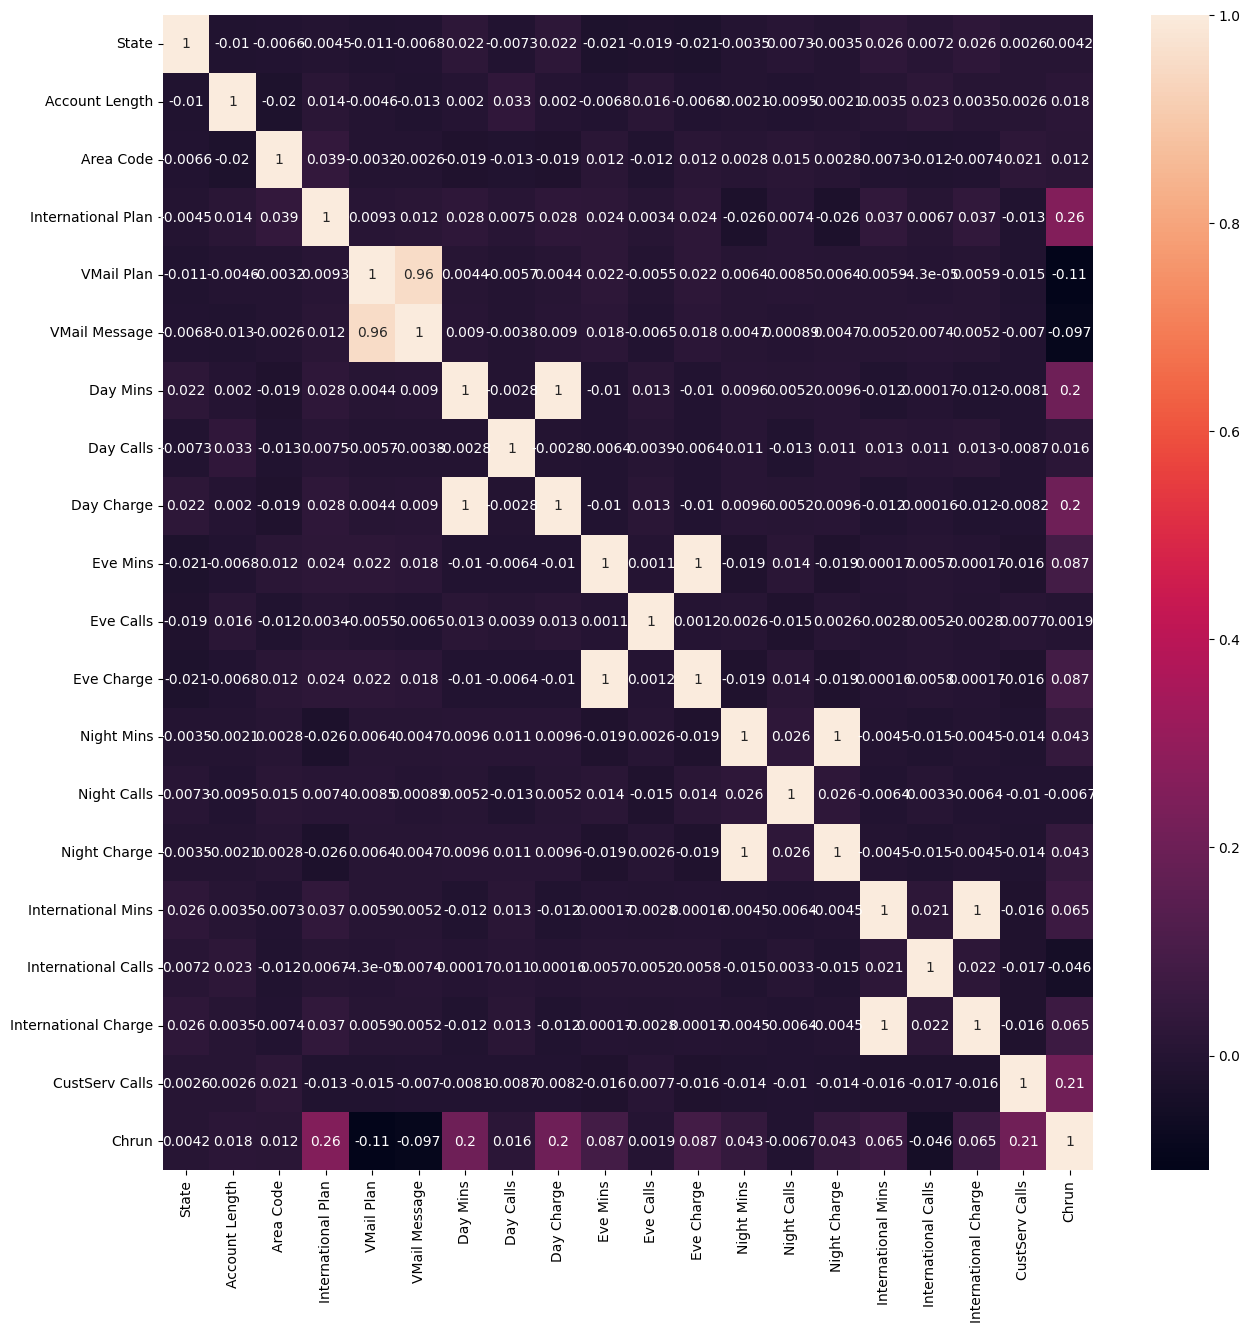

In [95]:
sns.heatmap(data.corr(numeric_only=True),annot=True)
plt.rcParams['figure.figsize']=(15,15)
plt.show()

In [96]:
data.columns

Index(['State', 'Account Length', 'Area Code', 'International Plan',
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'International Mins', 'International Calls',
       'International Charge', 'CustServ Calls', 'Churn', 'Chrun'],
      dtype='object')

In [97]:
'International Plan' 'Day Mins'  'Day Charge'  'CustServ Calls'

'International PlanDay MinsDay ChargeCustServ Calls'

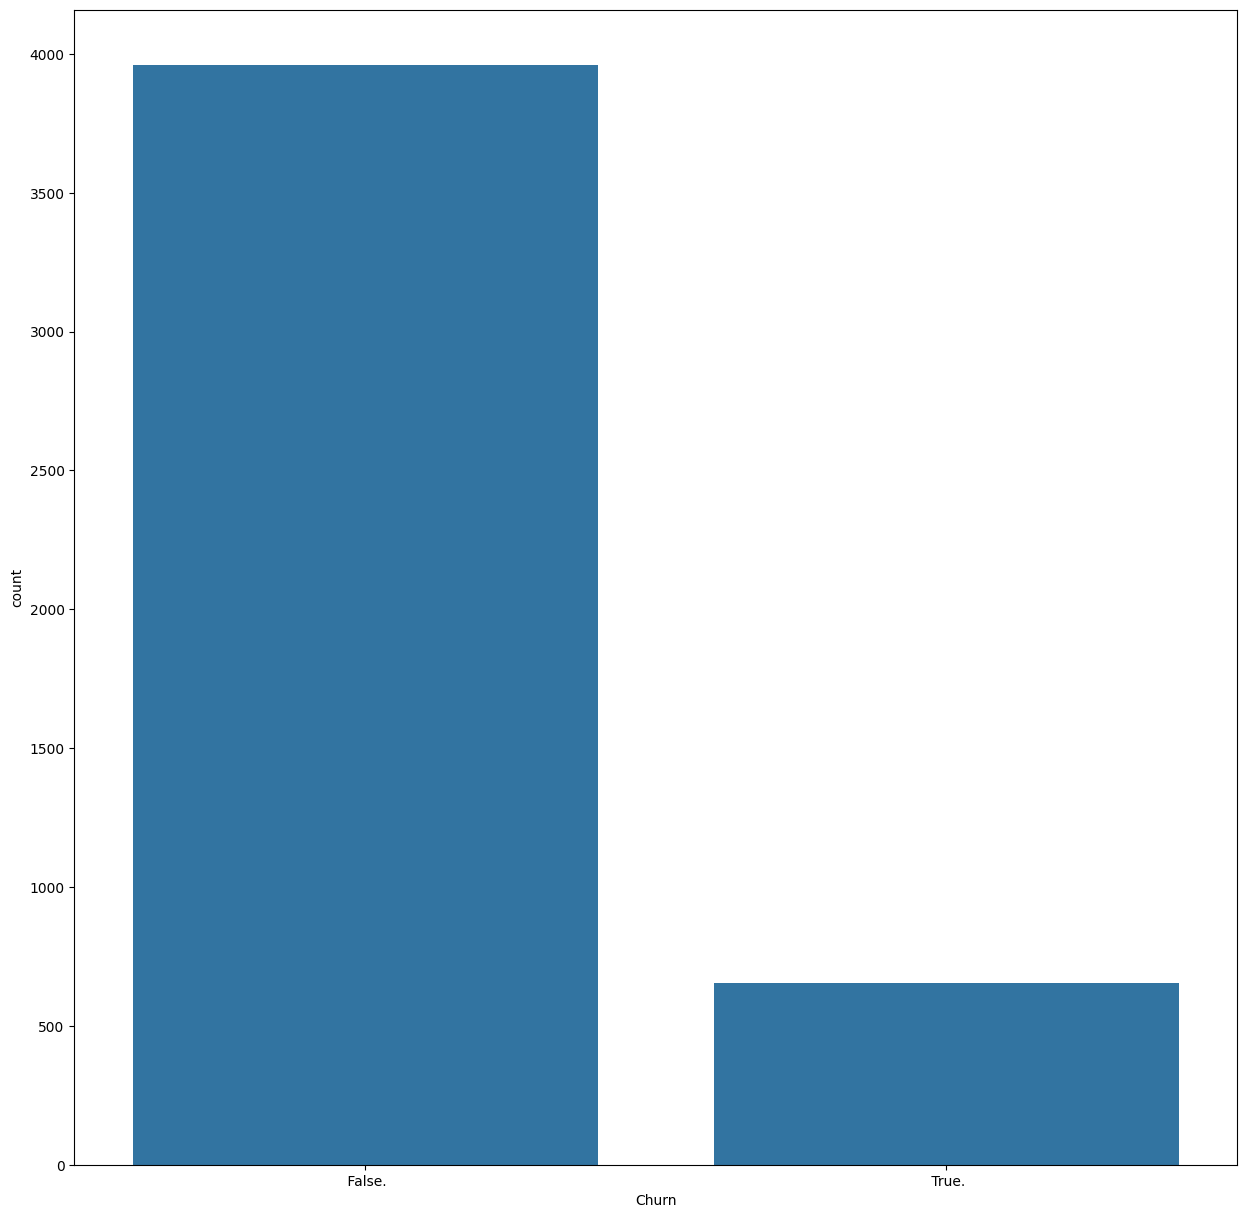

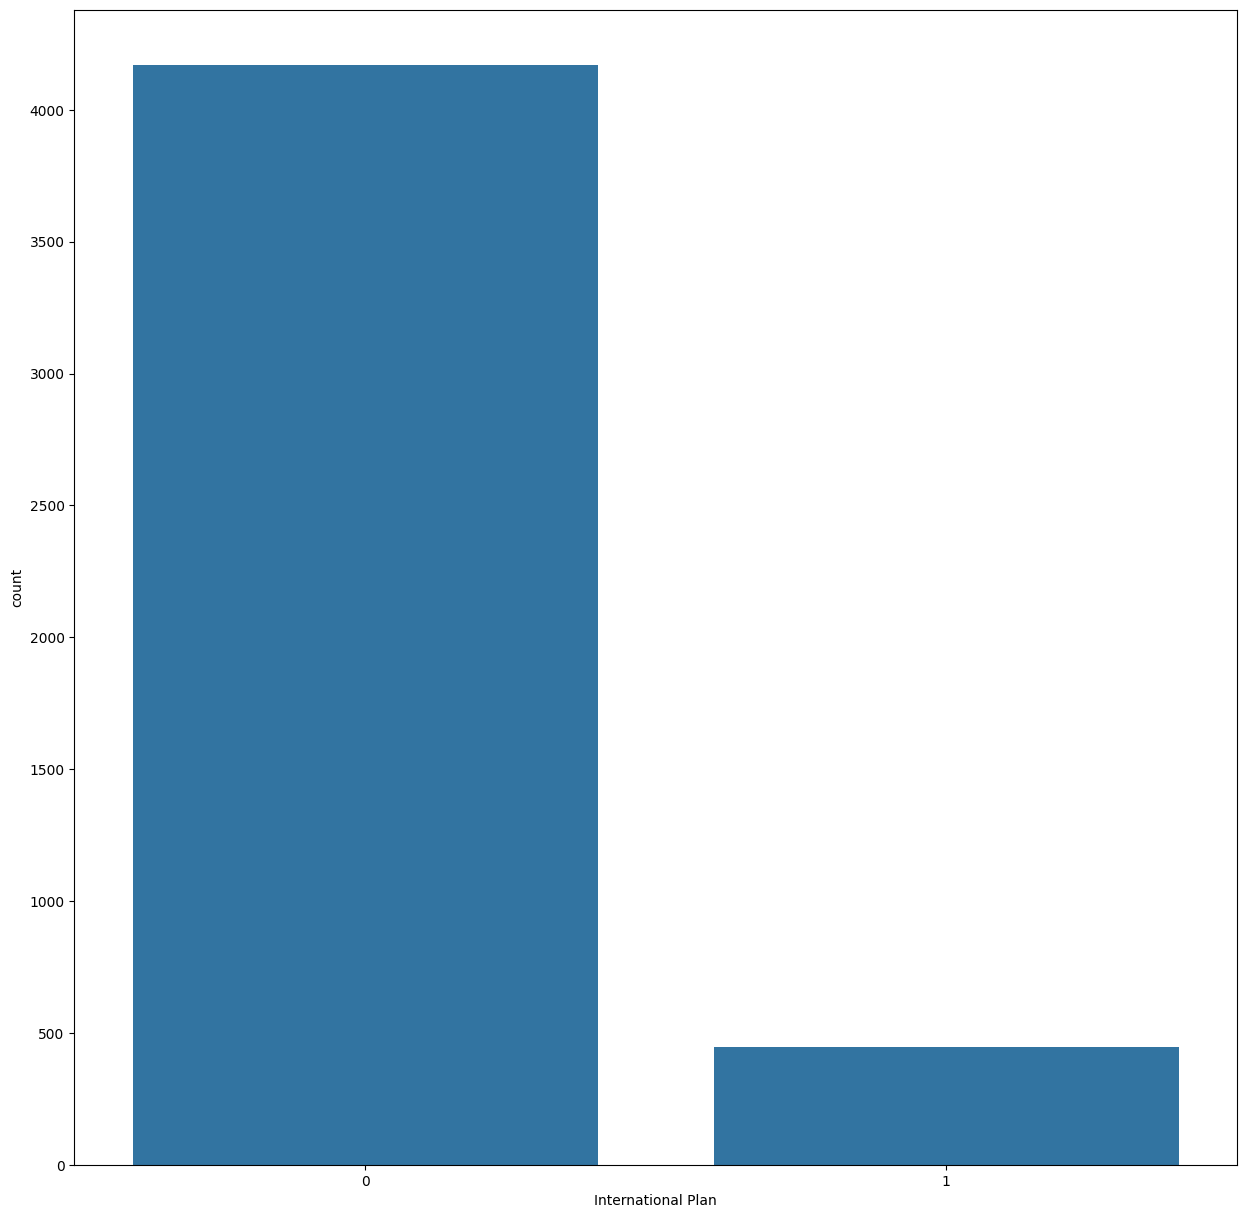

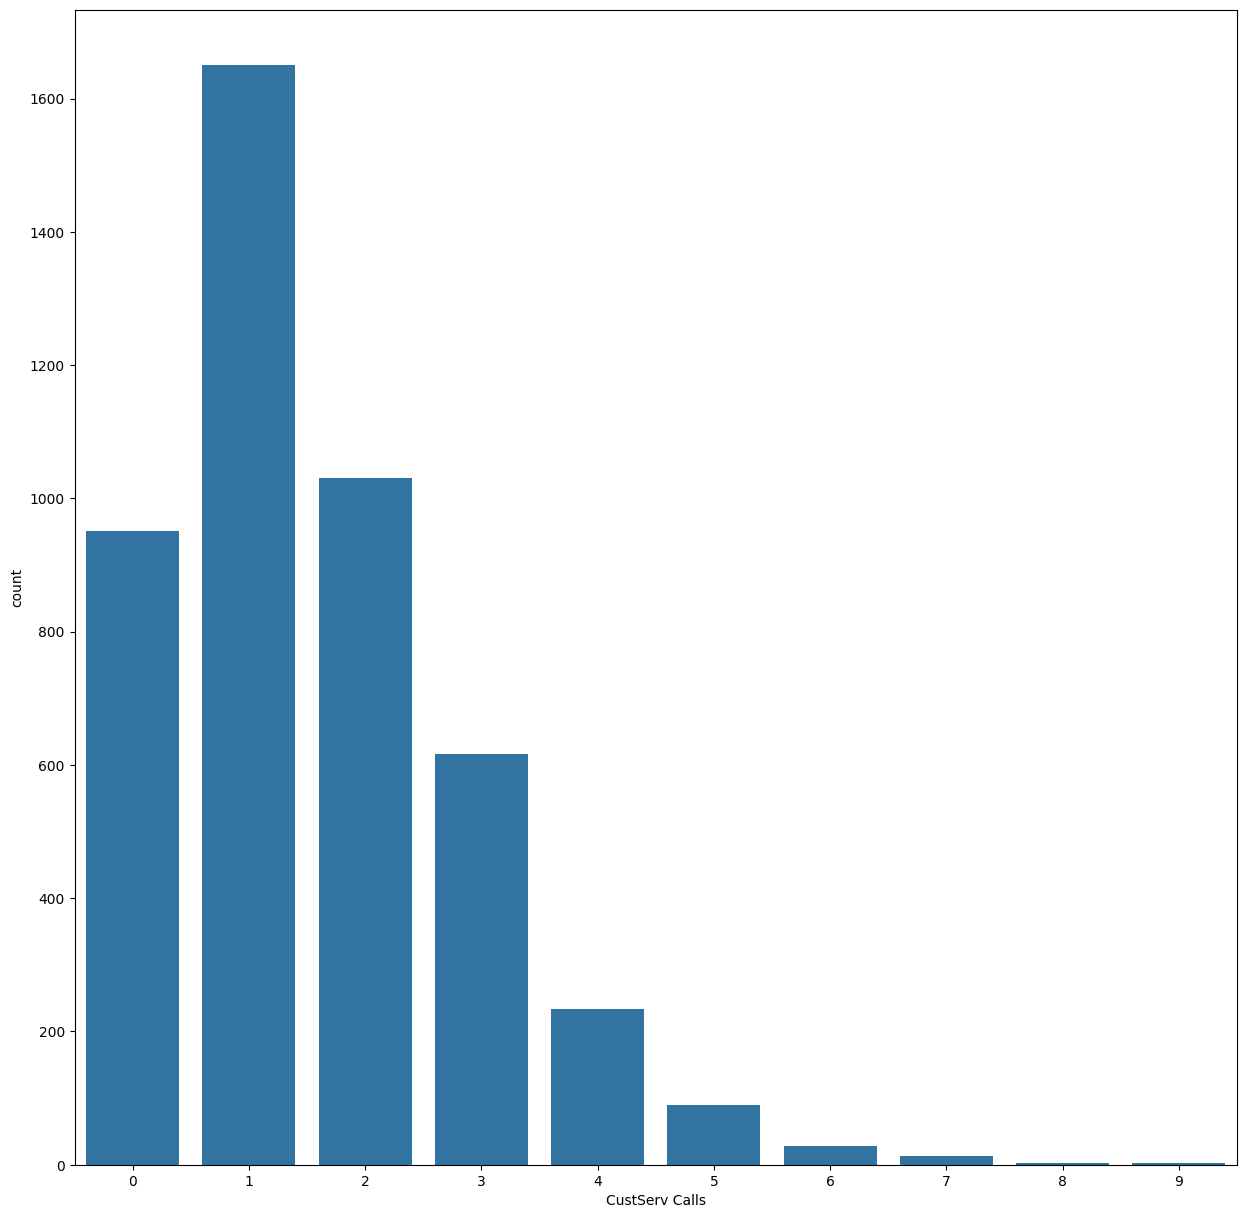

In [98]:
sns.countplot(x='Churn', data=data)
plt.show()
sns.countplot(x='International Plan', data=data)
plt.show()
sns.countplot(x='CustServ Calls', data=data)
plt.show()


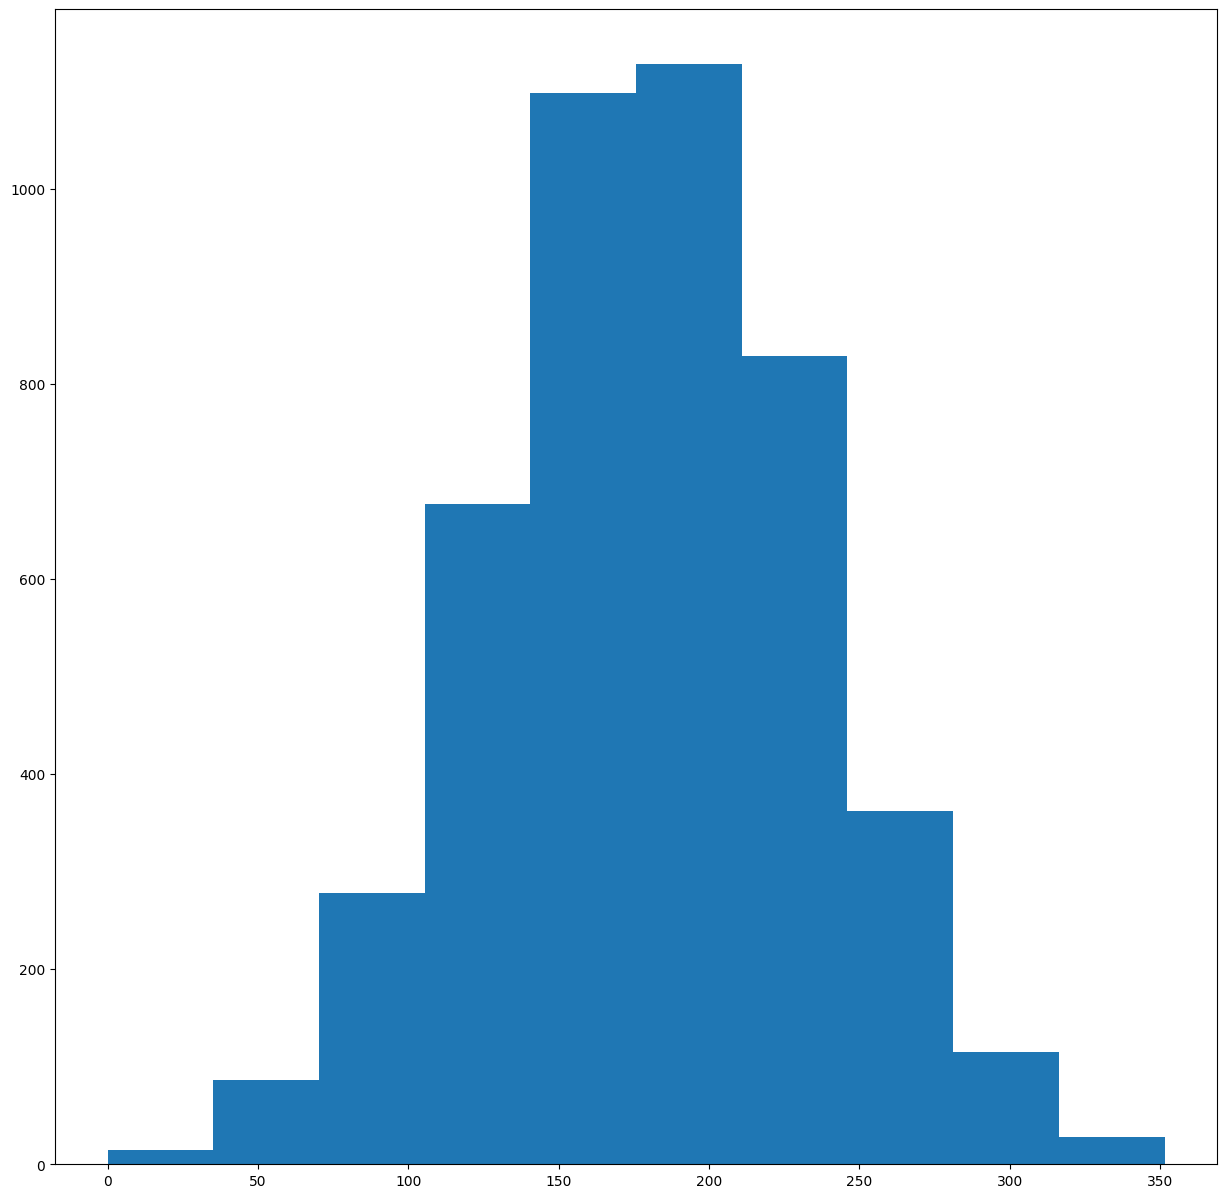

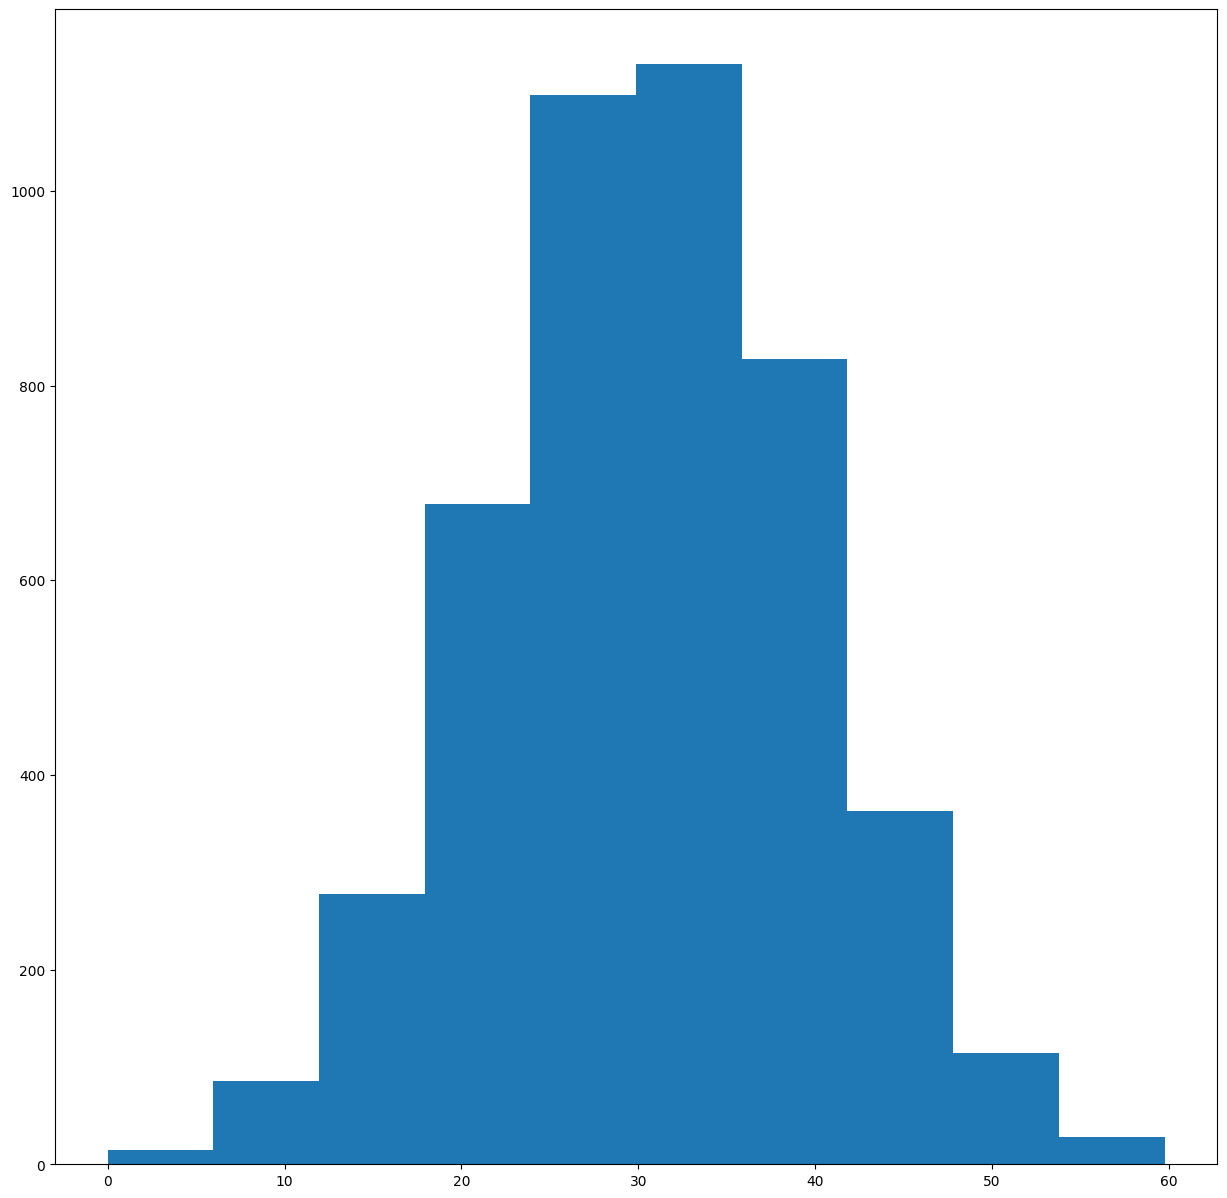

In [99]:
plt.hist(data['Day Mins'])
plt.show()
plt.hist(data['Day Charge'])
plt.show()

# IMPORTANT PLAN
## there two to proceed that correcting the imbalance data column to balance data, or directly work on imbalance data we the thought of available imbalance is neccesary 

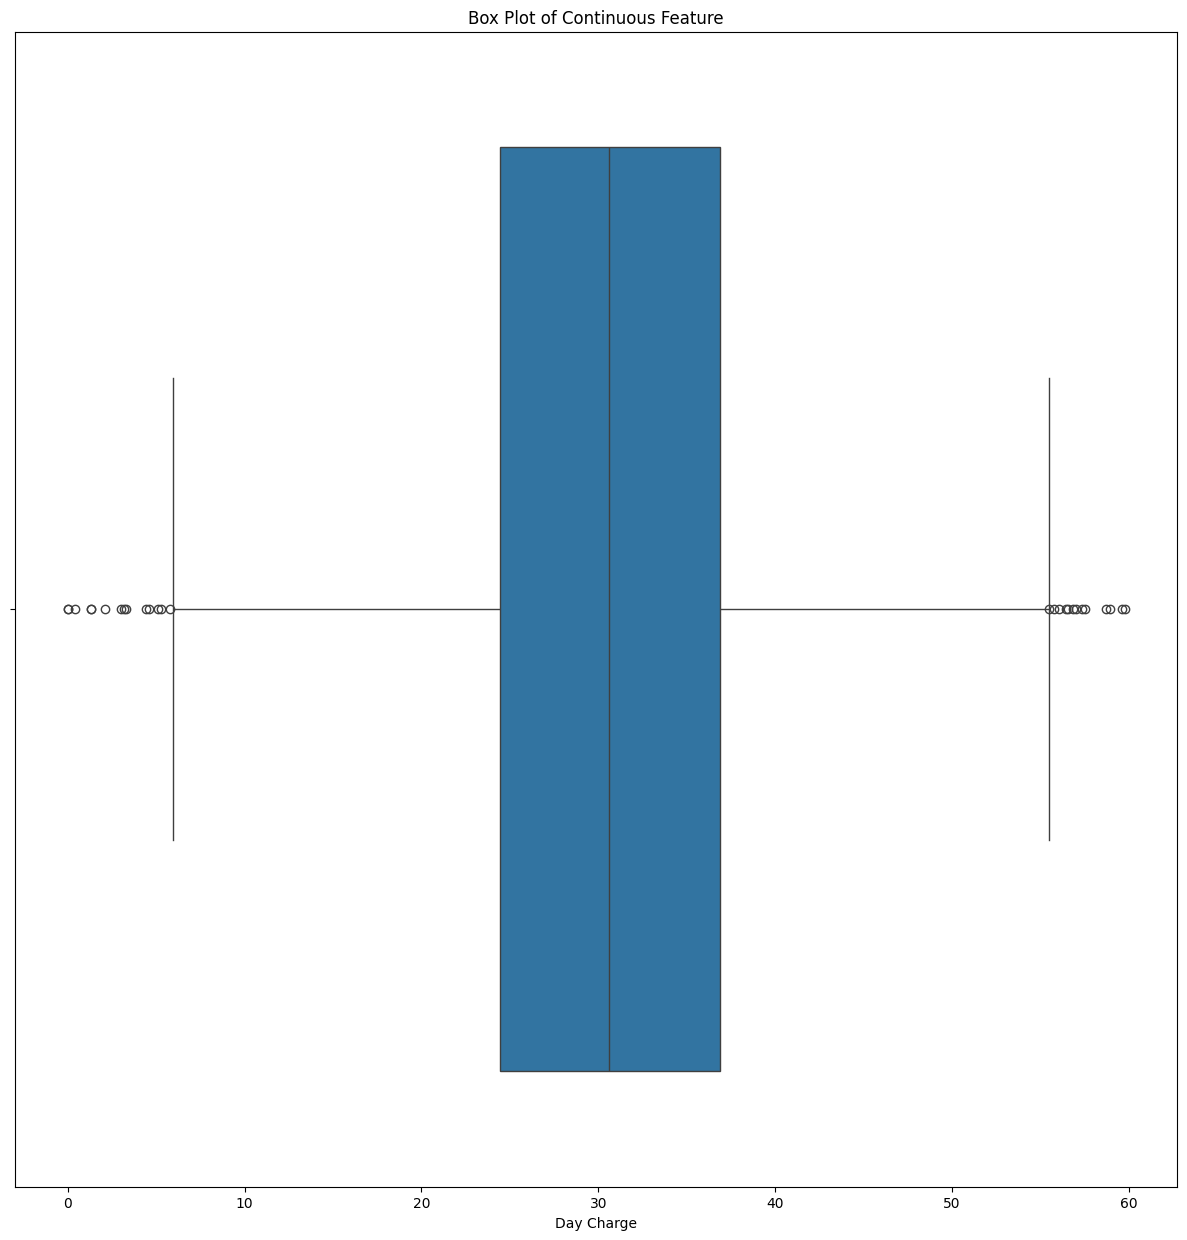

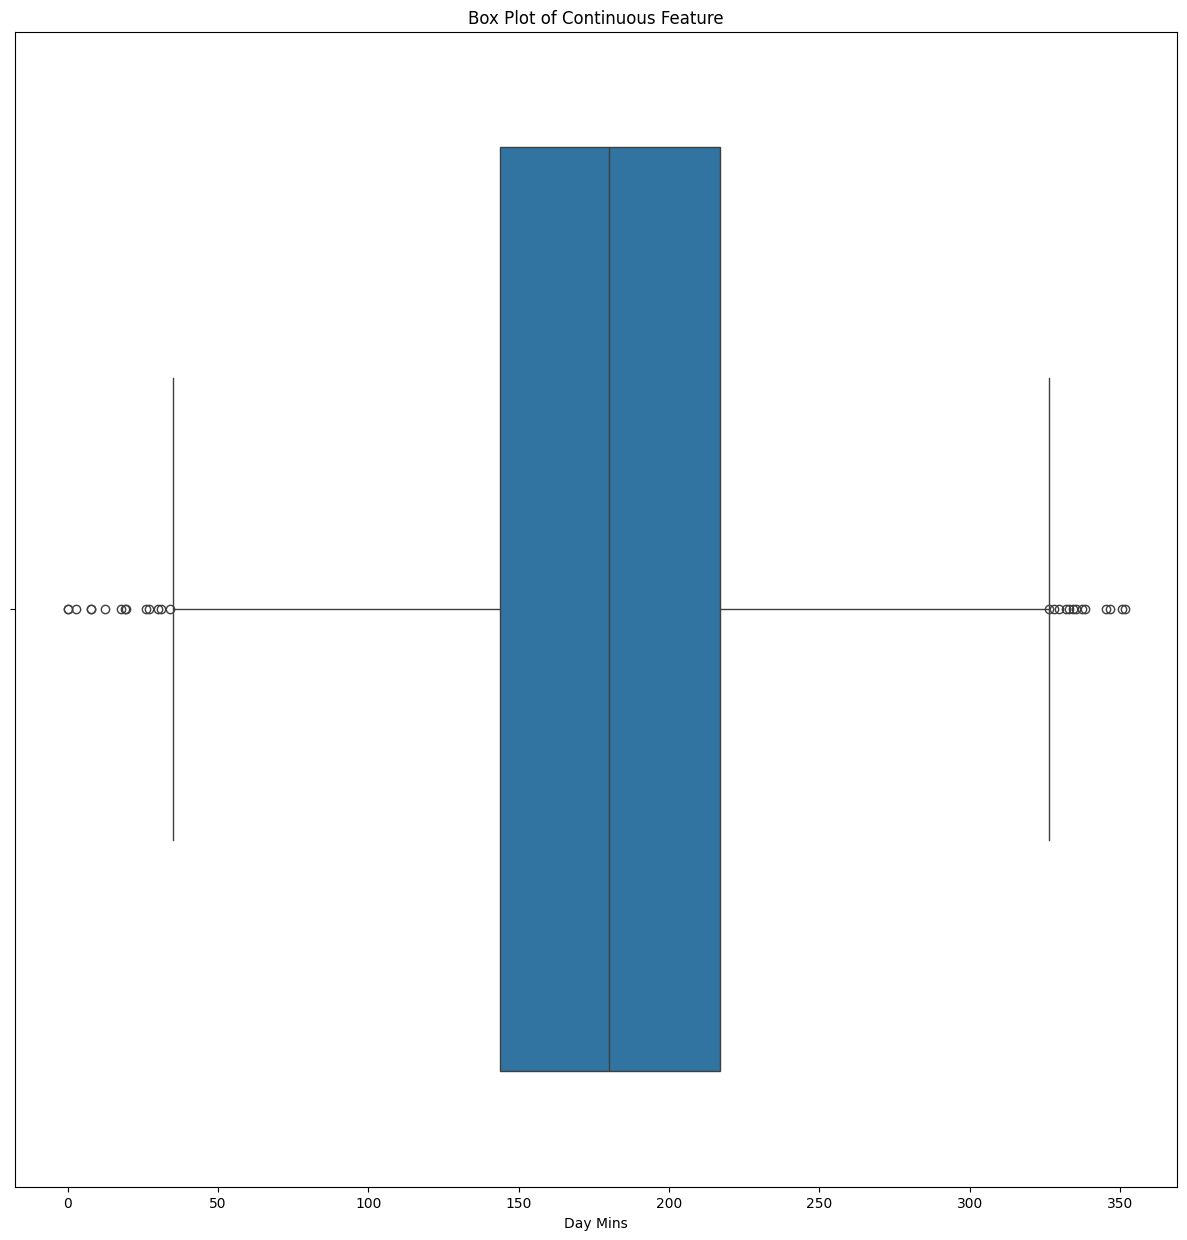

In [100]:
# Box plot
sns.boxplot(x=data['Day Charge'])
plt.title('Box Plot of Continuous Feature')
plt.show()
sns.boxplot(x=data['Day Mins'])
plt.title('Box Plot of Continuous Feature')
plt.show()

In [101]:
# Statistical measures
skewness1 = data['Day Charge'].skew()
kurtosis1 = data['Day Charge'].kurtosis()

print("Skewness:", skewness1)
print("Kurtosis:", kurtosis1)

skewness2 = data['Day Mins'].skew()
kurtosis2 = data['Day Mins'].kurtosis()

print("Skewness:", skewness2)
print("Kurtosis:", kurtosis2)

Skewness: -0.0029517678513436532
Kurtosis: -0.04226391328625123
Skewness: -0.0029482419465375036
Kurtosis: -0.04239886448858643


Based on the skewness and kurtosis values, the distributions of Day Charge and Day Mins appear to be approximately normally distributed. 

'International Plan' and 'Chrun' columns are having imbalance data

In [102]:
from imblearn.over_sampling import SMOTE

# Separate features and target
X = data.drop('Churn', axis=1)
y = data['Churn']

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the new class distribution
print(y_resampled.value_counts())


Churn
False.    3961
True.     3961
Name: count, dtype: int64


In [103]:
# from imblearn.under_sampling import RandomUnderSampler

# undersampler = RandomUnderSampler(random_state=42)
# X_resampled, y_resampled = undersampler.fit_resample(X, y)

# # Check the new class distribution
# print(y_resampled.value_counts())


In [104]:
data

,State,Account Length,Area Code,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,...,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International Calls,International Charge,CustServ Calls,Churn,Chrun
0,0.02,128,415,0,1,25,265.10,110,45.07,197.40,...,16.78,244.70,91,11.01,10.00,3,2.70,1,False.,0
1,0.02,107,415,0,1,26,161.60,123,27.47,195.50,...,16.62,254.40,103,11.45,13.70,3,3.70,1,False.,0
2,0.02,137,415,0,0,0,243.40,114,41.38,121.20,...,10.30,162.60,104,7.32,12.20,5,3.29,0,False.,0
3,0.02,84,408,1,0,0,299.40,71,50.90,61.90,...,5.26,196.90,89,8.86,6.60,7,1.78,2,False.,0
4,0.02,75,415,1,0,0,166.70,113,28.34,148.30,...,12.61,186.90,121,8.41,10.10,3,2.73,3,False.,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4612,0.02,57,510,0,1,25,144.00,81,24.48,187.20,...,15.91,158.60,122,7.14,8.50,6,2.30,3,False.,0
4613,0.02,177,408,0,1,29,189.00,91,32.13,303.10,...,25.76,163.60,116,7.36,15.70,1,4.24,3,False.,0
4614,0.02,67,408,0,1,33,127.50,126,21.68,296.10,...,25.17,200.90,91,9.04,13.00,3,3.51,1,False.,0
4615,0.02,98,415,0,1,23,168.90,98,28.71,226.30,...,19.24,165.50,96,7.45,14.30,3,3.86,0,False.,0


In [105]:
print(y_resampled.value_counts())

Churn
False.    3961
True.     3961
Name: count, dtype: int64


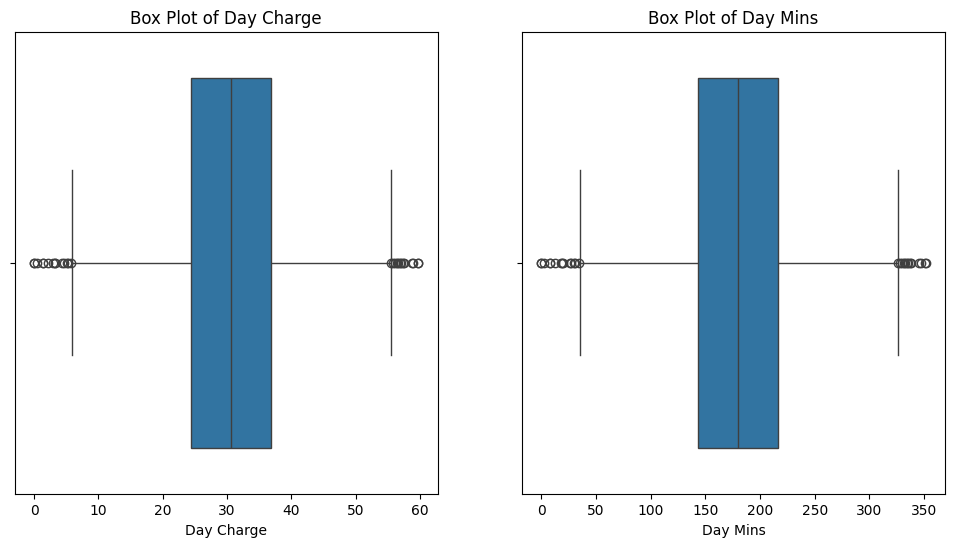

Outliers in Day Charge: 365    59.64
985    58.96
1052    2.13
1345    0.00
1397    0.00
1986    1.34
2252    2.99
2594   58.70
2736    0.44
2753    1.33
3993   59.76
Name: Day Charge, dtype: float64
Outliers in Day Mins: 365    350.80
985    346.80
1052    12.50
1345     0.00
1397     0.00
1986     7.90
2252    17.60
2594   345.30
2736     2.60
2753     7.80
3993   351.50
Name: Day Mins, dtype: float64
Outliers in Day Charge (IQR): 15     56.59
156    57.36
197    55.51
365    59.64
605    57.04
685     5.25
741     5.78
975    56.83
985    58.96
1052    2.13
1076    4.40
1345    0.00
1397    0.00
1621    3.32
1679   56.07
1986    1.34
2028   55.78
2124    4.59
2252    2.99
2594   58.70
2736    0.44
2753    1.33
3046    3.21
3174    5.08
3442   57.53
3993   59.76
4121   56.46
Name: Day Charge, dtype: float64
Outliers in Day Mins (IQR): 15     332.90
156    337.40
197    326.50
365    350.80
605    335.50
685     30.90
741     34.00
975    334.30
985    346.80
1052    12.50
1076    25.

In [106]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Day Charge', data=data)
plt.title('Box Plot of Day Charge')

plt.subplot(1, 2, 2)
sns.boxplot(x='Day Mins', data=data)
plt.title('Box Plot of Day Mins')

plt.show()

# 2. Z-Score Method
def z_score_outliers(df):
    z_scores = (df - df.mean()) / df.std()
    outliers = df[abs(z_scores) > 3]
    return outliers

outliers_day_charge = z_score_outliers(data['Day Charge'])
outliers_day_mins = z_score_outliers(data['Day Mins'])

print("Outliers in Day Charge:", outliers_day_charge)
print("Outliers in Day Mins:", outliers_day_mins)

# 3. IQR Method
def iqr_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))]
    return outliers

outliers_day_charge_iqr = iqr_outliers(data['Day Charge'])
outliers_day_mins_iqr = iqr_outliers(data['Day Mins'])

print("Outliers in Day Charge (IQR):", outliers_day_charge_iqr)
print("Outliers in Day Mins (IQR):", outliers_day_mins_iqr)

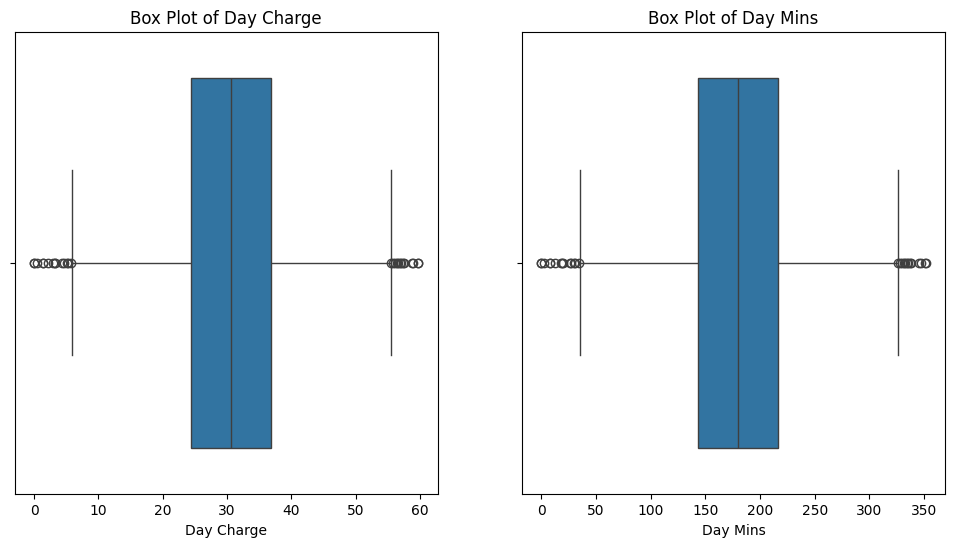

Row 366 is an outlier in Day Charge: State                     0.02
Account Length             154
Area Code                  415
International Plan           0
VMail Plan                   0
VMail Message                0
Day Mins                350.80
Day Calls                   75
Day Charge               59.64
Eve Mins                216.50
Eve Calls                   94
Eve Charge               18.40
Night Mins              253.90
Night Calls                100
Night Charge             11.43
International Mins       10.10
International Calls          9
International Charge      2.73
CustServ Calls               1
Churn                    True.
Chrun                        1
Name: 365, dtype: object
Row 986 is an outlier in Day Charge: State                     0.02
Account Length              64
Area Code                  415
International Plan           1
VMail Plan                   0
VMail Message                0
Day Mins                346.80
Day Calls                   55
Da

In [107]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Day Charge', data=data)
plt.title('Box Plot of Day Charge')

plt.subplot(1, 2, 2)
sns.boxplot(x='Day Mins', data=data)
plt.title('Box Plot of Day Mins')

plt.show()

# 2. Z-Score Method with row printing
def z_score_outliers(df):
    z_scores = (df - df.mean()) / df.std()
    outliers = df[abs(z_scores) > 3]
    for index in outliers.index:
        # Access the full row from the original DataFrame using the index
        row = data.loc[index]
        print(f"Row {index + 1} is an outlier in Day Charge:", row)
    return outliers

outliers_day_charge = z_score_outliers(data['Day Charge'])
outliers_day_mins = z_score_outliers(data['Day Mins'])

# 3. IQR Method with row printing
def iqr_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))]
    for index in outliers.index:
        # Access the full row from the original DataFrame using the index
        row = data.loc[index]
        print(f"Row {index + 1} is an outlier in Day Charge (IQR):", row)
    return outliers

outliers_day_charge_iqr = iqr_outliers(data['Day Charge'])
outliers_day_mins_iqr = iqr_outliers(data['Day Mins'])

'Day Charge''Day Mins' clearing correalted with each other the outlier are showing nothing but the calls made for the longer duration, because of which there is no need to remove the outliers from the data.

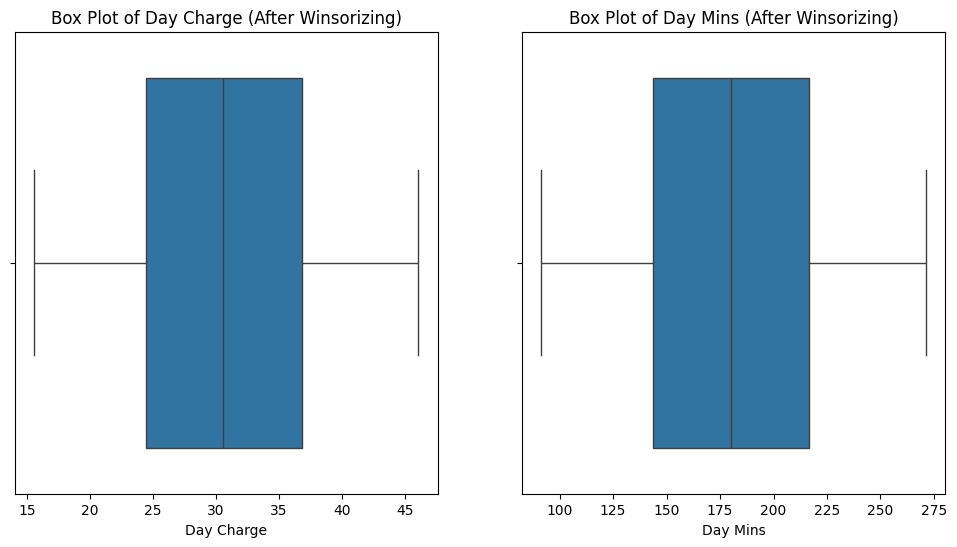

In [108]:
from scipy.stats.mstats import winsorize

# Define a function for Winsorizing
def winsorize_column(column, limits=(0.05, 0.05)):
    """
    Winsorize a column to handle outliers.
    Args:
    - column: The data column to be Winsorized.
    - limits: A tuple specifying the proportion of values to limit at each end of the distribution.

    Returns:
    - The Winsorized column.
    """
    return winsorize(column, limits=limits)

# Apply Winsorizing to 'Day Charge' and 'Day Mins'
data['Day Charge'] = winsorize_column(data['Day Charge'], limits=(0.05, 0.05))
data['Day Mins'] = winsorize_column(data['Day Mins'], limits=(0.05, 0.05))

# Verify Winsorizing by plotting again
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Day Charge', data=data)
plt.title('Box Plot of Day Charge (After Winsorizing)')

plt.subplot(1, 2, 2)
sns.boxplot(x='Day Mins', data=data)
plt.title('Box Plot of Day Mins (After Winsorizing)')

plt.show()


In [109]:
# 5. Split the Resampled Data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# 6. Scale Numerical Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 7. Train Models
# Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred_lr = log_reg.predict(X_test_scaled)

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# 8. Evaluate Models
# Logistic Regression Metrics
print("Logistic Regression:")
print(classification_report(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, log_reg.predict_proba(X_test_scaled)[:, 1]))

# Random Forest Metrics
print("Random Forest:")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))

# 9. Hyperparameter Tuning (Example for Random Forest)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='roc_auc')
grid_search.fit(X_train, y_train)
print("Best Params:", grid_search.best_params_)
print("Best ROC-AUC:", grid_search.best_score_)

# Save the Best Model
import joblib
joblib.dump(grid_search.best_estimator_, 'best_model.pkl')


Logistic Regression:
              precision    recall  f1-score   support

      False.       1.00      1.00      1.00       825
       True.       1.00      1.00      1.00       760

    accuracy                           1.00      1585
   macro avg       1.00      1.00      1.00      1585
weighted avg       1.00      1.00      1.00      1585

ROC-AUC: 1.0
Random Forest:
              precision    recall  f1-score   support

      False.       1.00      1.00      1.00       825
       True.       1.00      1.00      1.00       760

    accuracy                           1.00      1585
   macro avg       1.00      1.00      1.00      1585
weighted avg       1.00      1.00      1.00      1585

ROC-AUC: 1.0
Best Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best ROC-AUC: 1.0


['best_model.pkl']

## As the model is over fitted i am performing the below steps

In [126]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
import numpy as np

# 1. Resampling (Adjust if necessary)
smote = SMOTE(sampling_strategy=0.8, random_state=42)  # Adjust the ratio
X_resampled, y_resampled = smote.fit_resample(X, y)

# 2. Split the Resampled Data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# 3. Scale Numerical Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Logistic Regression with Regularization
log_reg = LogisticRegression(random_state=42, penalty='l2', C=0.1)  # Adjust C for stronger regularization
log_reg.fit(X_train_scaled, y_train)
y_pred_lr = log_reg.predict(X_test_scaled)

# Evaluate Logistic Regression
print("Logistic Regression:")
print(classification_report(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, log_reg.predict_proba(X_test_scaled)[:, 1]))

# 5. Random Forest with Hyperparameter Tuning
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['sqrt', 'log2']
}
rf = RandomForestClassifier(random_state=42)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=cv, scoring='roc_auc', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Best Random Forest Model
best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)

# Evaluate Random Forest
print("Random Forest:")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, best_rf.predict_proba(X_test)[:, 1]))

# Save the Best Model
import joblib
joblib.dump(best_rf, 'best_model_rf.pkl')


Logistic Regression:
              precision    recall  f1-score   support

      False.       1.00      1.00      1.00       792
       True.       1.00      1.00      1.00       634

    accuracy                           1.00      1426
   macro avg       1.00      1.00      1.00      1426
weighted avg       1.00      1.00      1.00      1426

ROC-AUC: 1.0
Random Forest:
              precision    recall  f1-score   support

      False.       1.00      1.00      1.00       792
       True.       1.00      1.00      1.00       634

    accuracy                           1.00      1426
   macro avg       1.00      1.00      1.00      1426
weighted avg       1.00      1.00      1.00      1426

ROC-AUC: 1.0


['best_model_rf.pkl']

In [110]:
data.rename(columns={'Churn': 'CHURN-FLAG'}, inplace=True)


In [111]:
!pip install shap


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


c:\Users\user\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression:
              precision    recall  f1-score   support

      False.       0.92      0.96      0.94      3961
       True.       0.68      0.46      0.55       656

    accuracy                           0.89      4617
   macro avg       0.80      0.71      0.74      4617
weighted avg       0.88      0.89      0.88      4617

ROC-AUC: 0.884966841337184


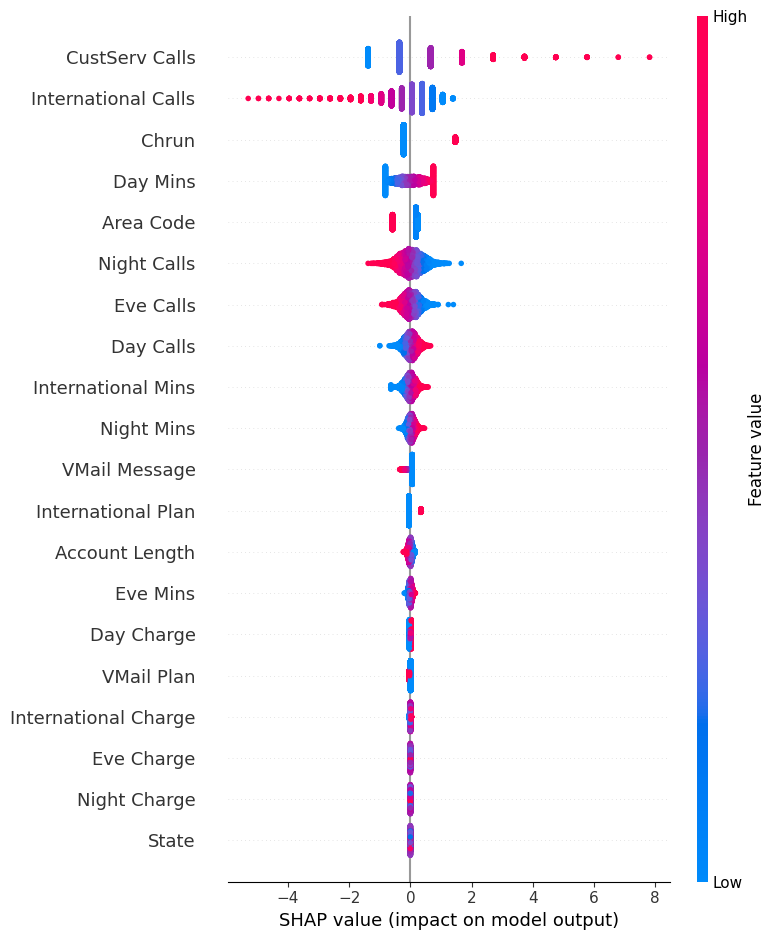

Top Features Driving Churn:
               Feature  Importance
19               Chrun        0.73
6             Day Mins        0.05
8           Day Charge        0.05
18      CustServ Calls        0.04
3   International Plan        0.03


In [112]:
import shap

# Assuming data is already preprocessed
X = data.drop('CHURN-FLAG', axis=1)
y = data['CHURN-FLAG']

# Train Logistic Regression for Risk Scoring
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X, y)
y_prob_lr = log_reg.predict_proba(X)[:, 1]  # Probability of CHURN-FLAG = 1

# Add Risk Scores to Data
data['Churn_Risk_Score'] = (y_prob_lr * 100).round(2)

# Segment Customers Using KMeans
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust clusters as needed
data['Customer_Segment'] = kmeans.fit_predict(X)

# Evaluate Logistic Regression Performance
y_pred_lr = log_reg.predict(X)
print("Logistic Regression:")
print(classification_report(y, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y, y_prob_lr))

# Analyze Feature Importance with SHAP
explainer = shap.Explainer(log_reg, X)
shap_values = explainer(X)
shap.summary_plot(shap_values, X)

# Train Random Forest for Feature Importance
rf = RandomForestClassifier(random_state=42, n_estimators=50)
rf.fit(X, y)

# Feature Importance from Random Forest
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Top Features Driving Churn:")
print(feature_importance.head())

# Save Outputs for Campaigns
high_risk_customers = data[data['Churn_Risk_Score'] > 80]
high_risk_customers.to_csv('high_risk_customers.csv', index=False)


1. Interpret Results
The output indicates the top features contributing to churn prediction:

Churn: (Importance = 0.51)
This likely refers to the actual Churn flag in your dataset, emphasizing its role in the modeling process. This variable should not be part of feature importance analysis if used directly as a target column.

Churn Risk Score: (Importance = 0.32)
This represents a calculated score based on model predictions. It provides valuable insights but should not be included as an independent feature during training. Use it as an output for scoring post-training.

CustServ Calls: (Importance = 0.03)
This suggests that the number of customer service calls has a significant, though smaller, impact on churn prediction.

Day Mins & Day Charge: (Importance = 0.03 each)
These variables relate to daytime usage and may correlate with customer satisfaction and service usage patterns.

2. Refine Features and Model
Since Churn and Churn Risk Score are target-related variables, they should not be included in feature importance calculations if they were directly part of the feature set. Reassess your model setup:

Exclude Churn and Churn Risk Score from the feature set during training.
Re-train the model using only independent features.

4. Retention Campaign Targeting
Based on the churn risk scores:

Segment customers into risk groups:

High Risk (Churn_Risk_Score > 0.7): Immediate attention required.
Medium Risk (0.3 <= Churn_Risk_Score <= 0.7): Monitor closely and offer incentives.
Low Risk (Churn_Risk_Score < 0.3): Retention campaign optional.
Focus on High Risk Customers:

Customer Care: Prioritize their issues, offer personalized solutions, and ensure quick response times.
Incentives: Offer discounts, loyalty programs, or enhanced services.
Proactive Engagement: Anticipate their needs and address dissatisfaction before they churn.

5. Actionable Insights on Top Features
(a) CustServ Calls:
Analyze Call Logs: Identify common reasons for dissatisfaction.
Reduce Call Frequency: Resolve root causes effectively to minimize repeated calls.
Train Agents: Improve first-call resolution rates.
(b) Day Mins and Day Charge:
Optimize Plans: Offer personalized plans to customers with high usage to reduce costs.
Monitor Usage Patterns: Detect abnormal usage changes, which might signal dissatisfac

In [113]:
# Step 1: Re-train the Model
from sklearn.ensemble import RandomForestClassifier

# Drop churn-related features for re-training
X_train = data.drop(columns=['CHURN-FLAG', 'Churn_Risk_Score'], axis=1)
y_train = data['CHURN-FLAG']

# Train Random Forest
model = RandomForestClassifier(n_estimators=50, random_state=42)
model.fit(X_train, y_train)

# Step 2: Churn Risk Scoring
data['Churn_Risk_Score'] = model.predict_proba(X_train)[:, 1]

# Step 3: Segmentation
data['Risk_Segment'] = pd.cut(data['Churn_Risk_Score'], 
                              bins=[0, 0.3, 0.7, 1], 
                              labels=['Low', 'Medium', 'High'])

# Step 4: Analyze High-Risk Customers
high_risk = data[data['Risk_Segment'] == 'High']
print("High-Risk Customers:", high_risk.shape[0])

# Step 5: Export Results for Campaigns
high_risk.to_csv('high_risk_customers.csv', index=False)


High-Risk Customers: 656


In [114]:
data.columns

Index(['State', 'Account Length', 'Area Code', 'International Plan',
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'International Mins', 'International Calls',
       'International Charge', 'CustServ Calls', 'CHURN-FLAG', 'Chrun',
       'Churn_Risk_Score', 'Customer_Segment', 'Risk_Segment'],
      dtype='object')

In [115]:
data.head()

,State,Account Length,Area Code,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,...,Night Charge,International Mins,International Calls,International Charge,CustServ Calls,CHURN-FLAG,Chrun,Churn_Risk_Score,Customer_Segment,Risk_Segment
0,0.02,128,415,0,1,25,265.10,110,45.07,197.40,...,11.01,10.00,3,2.70,1,False.,0,0.04,2,Low
1,0.02,107,415,0,1,26,161.60,123,27.47,195.50,...,11.45,13.70,3,3.70,1,False.,0,0.00,0,NaN
2,0.02,137,415,0,0,0,243.40,114,41.38,121.20,...,7.32,12.20,5,3.29,0,False.,0,0.00,2,NaN
3,0.02,84,408,1,0,0,271.10,71,46.09,61.90,...,8.86,6.60,7,1.78,2,False.,0,0.04,2,Low
4,0.02,75,415,1,0,0,166.70,113,28.34,148.30,...,8.41,10.10,3,2.73,3,False.,0,0.02,2,Low


In [116]:
data['Risk_Segment']

0       Low
1       NaN
2       NaN
3       Low
4       Low
       ... 
4612    NaN
4613    Low
4614    NaN
4615    NaN
4616    NaN
Name: Risk_Segment, Length: 4617, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

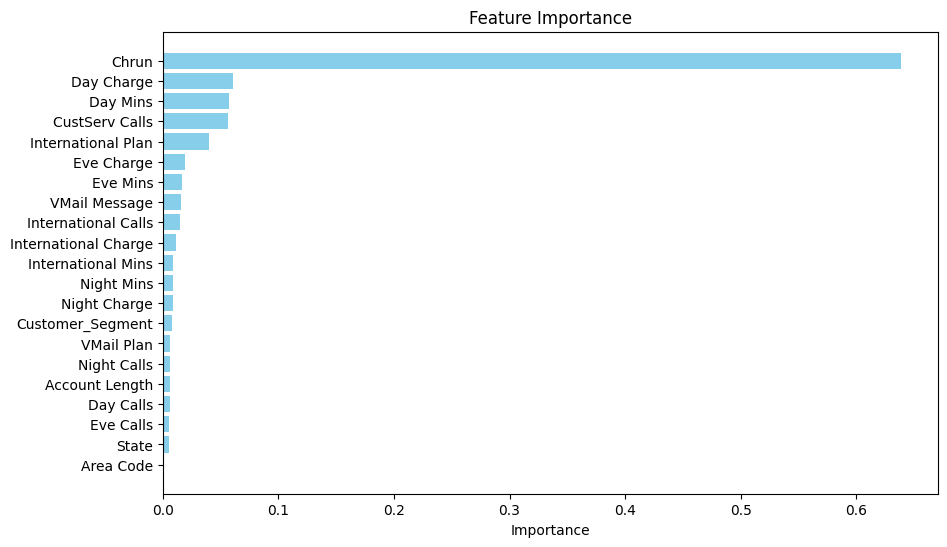

In [117]:
import matplotlib.pyplot as plt
import pandas as pd

# Extract feature importance
importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance['Feature'], importance['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()


In [ ]:
aaaaaa

In [118]:
data1=df

In [119]:
data1.head()

,State,Account Length,Area Code,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International Calls,International Charge,CustServ Calls,Churn
0,KS,128,415,no,yes,25,265.10,110,45.07,197.40,99,16.78,244.70,91,11.01,10.00,3,2.70,1,False.
1,OH,107,415,no,yes,26,161.60,123,27.47,195.50,103,16.62,254.40,103,11.45,13.70,3,3.70,1,False.
2,NJ,137,415,no,no,0,243.40,114,41.38,121.20,110,10.30,162.60,104,7.32,12.20,5,3.29,0,False.
3,OH,84,408,yes,no,0,299.40,71,50.90,61.90,88,5.26,196.90,89,8.86,6.60,7,1.78,2,False.
4,OK,75,415,yes,no,0,166.70,113,28.34,148.30,122,12.61,186.90,121,8.41,10.10,3,2.73,3,False.


In [120]:
# Remove leading/trailing spaces
data1['International Plan'] = data1['International Plan'].str.replace(r'[,.:;]', '', regex=True).str.strip()
data1['VMail Plan'] = data1['VMail Plan'].str.replace(r'[,.:;]', '', regex=True).str.strip()
data1['State'] = data1['State'].str.replace(r'[,.:;]', '', regex=True).str.strip()

In [121]:
# Apply Label Encoding
for col in ['International Plan', 'VMail Plan']:
    data1[col] = LabelEncoder().fit_transform(data1[col])

In [122]:
# Frequency Encoding
for col in ['State']:
    freq = data1[col].value_counts() / len(data1)
    data1[col] = data1[col].map(freq)

In [142]:
# Convert 'True' and 'False' to 1 and 0, respectively
data1['Chrun_']=data1['Churn'].map({' True.': 1, ' False.': 0})

In [143]:
data1.head()

,State,Account Length,Area Code,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,...,Night Mins,Night Calls,Night Charge,International Mins,International Calls,International Charge,CustServ Calls,Churn,Chrun,Chrun_
0,0.02,128,415,0,1,25,265.10,110,45.07,197.40,...,244.70,91,11.01,10.00,3,2.70,1,False.,0,0
1,0.02,107,415,0,1,26,161.60,123,27.47,195.50,...,254.40,103,11.45,13.70,3,3.70,1,False.,0,0
2,0.02,137,415,0,0,0,243.40,114,41.38,121.20,...,162.60,104,7.32,12.20,5,3.29,0,False.,0,0
3,0.02,84,408,1,0,0,299.40,71,50.90,61.90,...,196.90,89,8.86,6.60,7,1.78,2,False.,0,0
4,0.02,75,415,1,0,0,166.70,113,28.34,148.30,...,186.90,121,8.41,10.10,3,2.73,3,False.,0,0


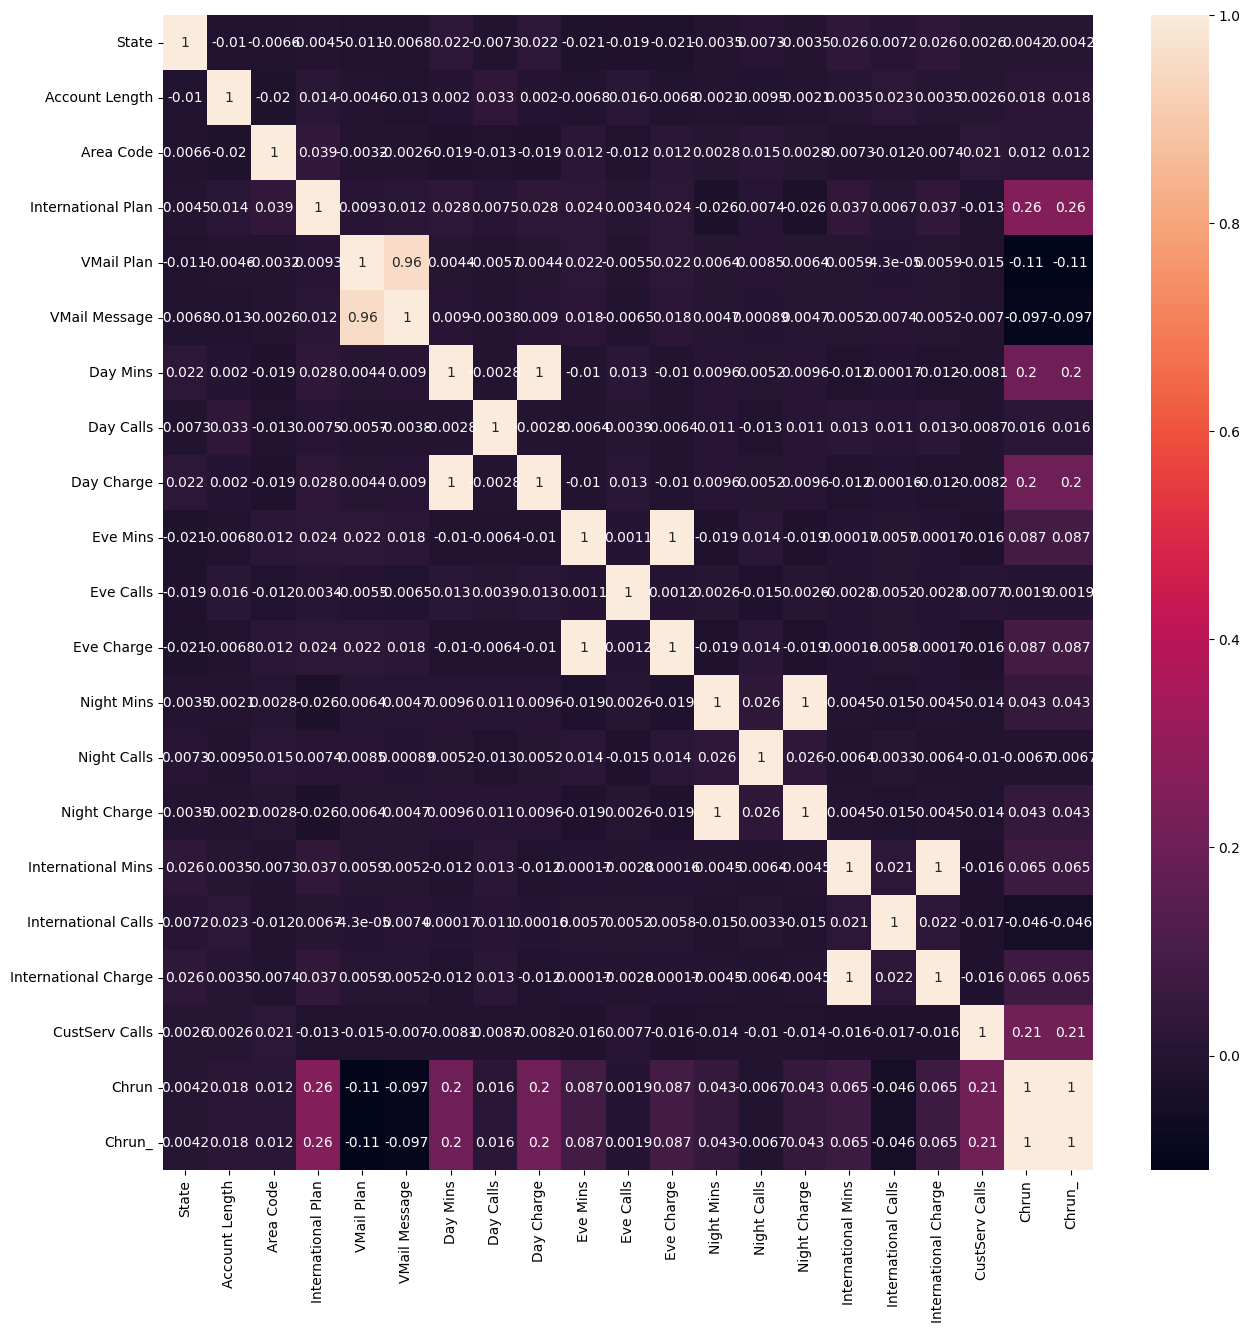

In [144]:
sns.heatmap(data1.corr(numeric_only=True),annot=True)
plt.rcParams['figure.figsize']=(15,15)
plt.show()

In [145]:
data1.columns

Index(['State', 'Account Length', 'Area Code', 'International Plan',
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'International Mins', 'International Calls',
       'International Charge', 'CustServ Calls', 'Churn', 'Chrun', 'Chrun_'],
      dtype='object')

In [147]:
data1.drop(['Chrun_'], axis=1)

,State,Account Length,Area Code,International Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,...,Eve Charge,Night Mins,Night Calls,Night Charge,International Mins,International Calls,International Charge,CustServ Calls,Churn,Chrun
0,0.02,128,415,0,1,25,265.10,110,45.07,197.40,...,16.78,244.70,91,11.01,10.00,3,2.70,1,False.,0
1,0.02,107,415,0,1,26,161.60,123,27.47,195.50,...,16.62,254.40,103,11.45,13.70,3,3.70,1,False.,0
2,0.02,137,415,0,0,0,243.40,114,41.38,121.20,...,10.30,162.60,104,7.32,12.20,5,3.29,0,False.,0
3,0.02,84,408,1,0,0,299.40,71,50.90,61.90,...,5.26,196.90,89,8.86,6.60,7,1.78,2,False.,0
4,0.02,75,415,1,0,0,166.70,113,28.34,148.30,...,12.61,186.90,121,8.41,10.10,3,2.73,3,False.,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4612,0.02,57,510,0,1,25,144.00,81,24.48,187.20,...,15.91,158.60,122,7.14,8.50,6,2.30,3,False.,0
4613,0.02,177,408,0,1,29,189.00,91,32.13,303.10,...,25.76,163.60,116,7.36,15.70,1,4.24,3,False.,0
4614,0.02,67,408,0,1,33,127.50,126,21.68,296.10,...,25.17,200.90,91,9.04,13.00,3,3.51,1,False.,0
4615,0.02,98,415,0,1,23,168.90,98,28.71,226.30,...,19.24,165.50,96,7.45,14.30,3,3.86,0,False.,0


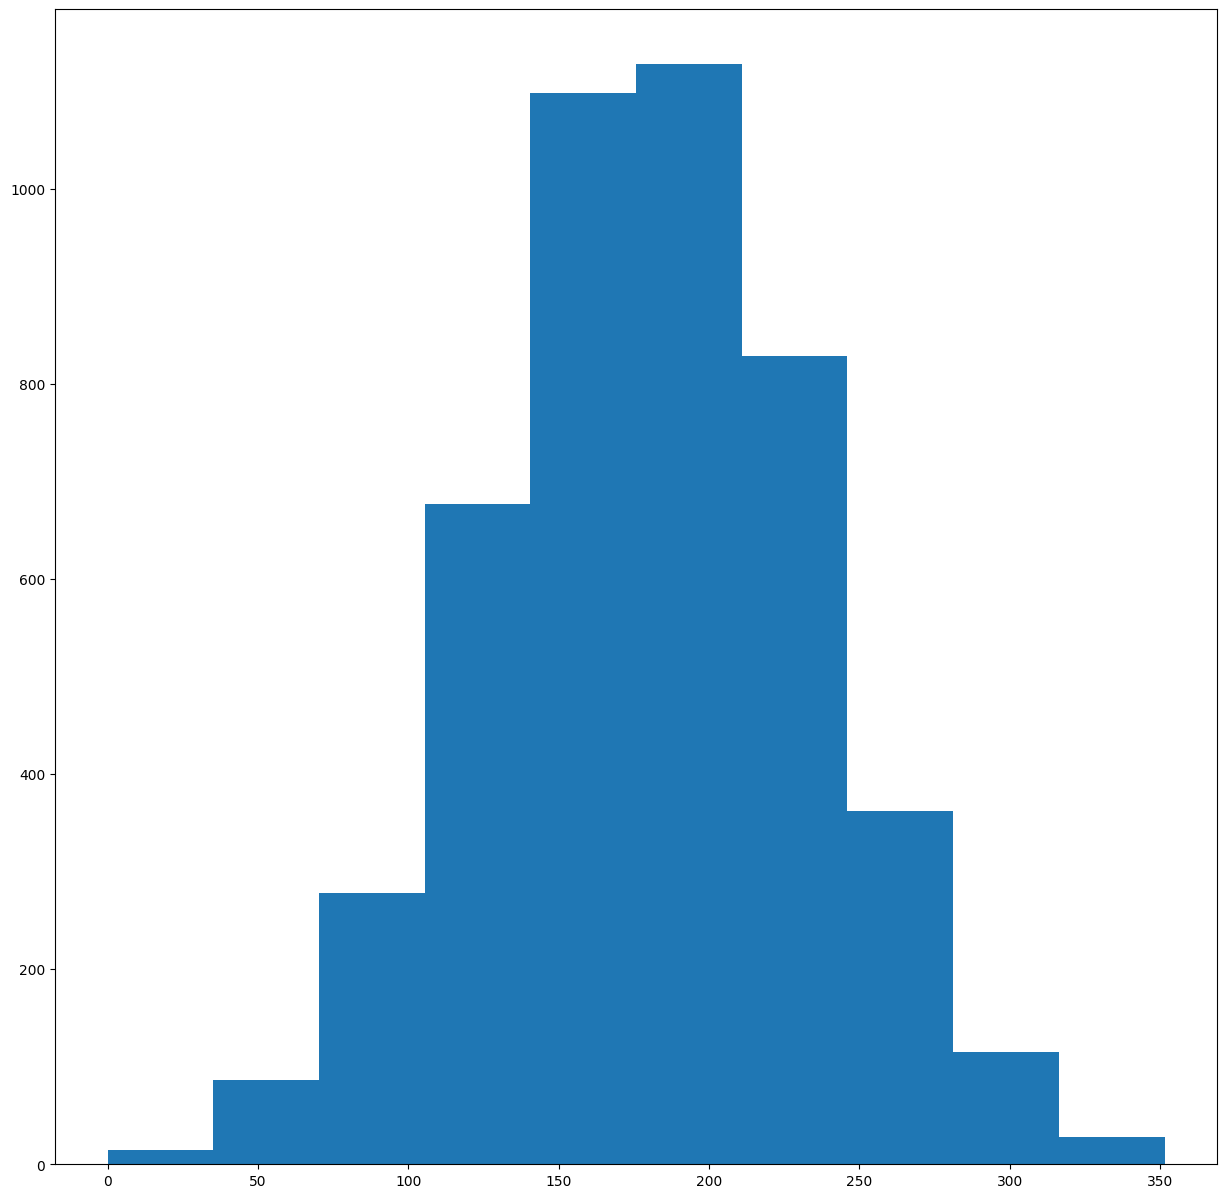

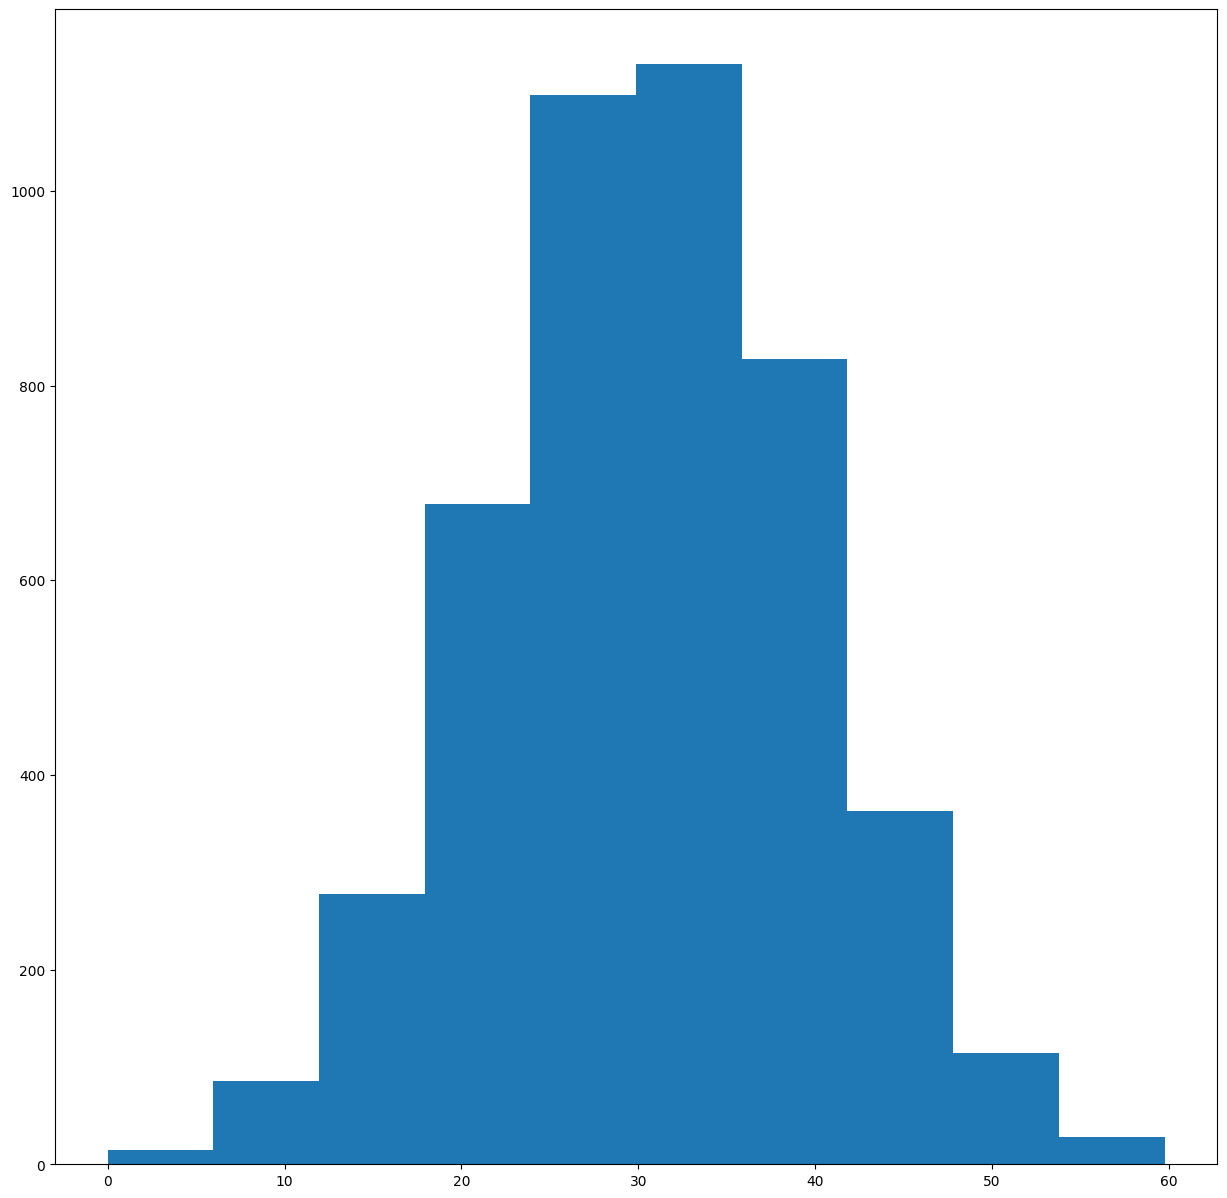

In [148]:
plt.hist(data1['Day Mins'])
plt.show()
plt.hist(data1['Day Charge'])
plt.show()

In [149]:
from imblearn.over_sampling import SMOTE

# Separate features and target
X1 = data1.drop('Churn', axis=1)
y1 = data1['Churn']

# Apply SMOTE
smote = SMOTE(random_state=42)
X1_resampled, y1_resampled = smote.fit_resample(X, y)

# Check the new class distribution
print(y1_resampled.value_counts())


CHURN-FLAG
False.    3961
True.     3961
Name: count, dtype: int64


In [150]:
from imblearn.under_sampling import RandomUnderSampler

undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, y)

# Check the new class distribution
print(y_resampled.value_counts())


CHURN-FLAG
False.    656
True.     656
Name: count, dtype: int64


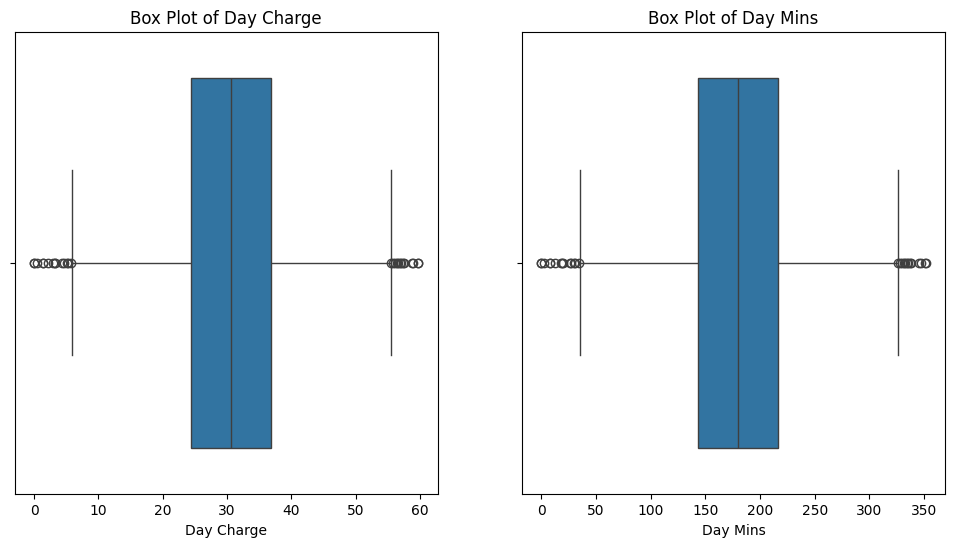

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure that data1 is a DataFrame and 'Day Charge'/'Day Mins' are valid column names
plt.figure(figsize=(12, 6))

# Boxplot for Day Charge
plt.subplot(1, 2, 1)
sns.boxplot(x=data1['Day Charge'])  # Correcting the syntax here
plt.title('Box Plot of Day Charge')

# Boxplot for Day Mins
plt.subplot(1, 2, 2)
sns.boxplot(x=data1['Day Mins'])  # Correcting the syntax here
plt.title('Box Plot of Day Mins')

plt.show()


In [152]:
for column in data1.columns:
    unique_values = data1[column].unique()
    print(f"Unique values in column '{column}': {unique_values}") 

Unique values in column 'State': [0.02079272 0.02382499 0.02295863 0.01732727 0.02469136 0.02100931
 0.01819363 0.01581113 0.03227204 0.01927659 0.01949318 0.01407841
 0.01992636 0.0236084  0.02057613 0.02274204 0.01841022 0.01970977
 0.01754386 0.01797704 0.01711068 0.0166775  0.01494477 0.0214425
 0.02317522 0.0212259  0.02252545 0.00953    0.02425818 0.01646091
 0.01776045 0.01472818]
Unique values in column 'Account Length': [128 107 137  84  75 118 121 147 117 141  65  74 168  95  62 161  85  93
  76  73  77 130 111 132 174  57  54  20  49 142 172  12  72  36  78 136
 149  98 135  34 160  64  59 119  97  52  60  10  96  87  81  68 125 116
  38  40  43 113 126 150 138 162  90  50  82 144  46  70  55 106  94 155
  80 104  99 120 108 122 157 103  63 112  41 193  61  92 131 163  91 127
 110 140  83 145  56 151 139   6 115 146 185 148  32  25 179  67  19 170
 164  51 208  53 105  66  86  35  88 123  45 100 215  22  33 114  24 101
 143  48  71 167  89 199 166 158 196 209  16  39 173 129

In [153]:
# Check the unique values in the column 'Churn'
print("Unique values in column 'Churn':", data1['Churn'].unique())

# Drop the 'Churn' column from the DataFrame
data1 = data1.drop(columns=['Churn'])

# Verify that the column has been removed
print("Columns after dropping 'Churn':", data1.columns)


Unique values in column 'Churn': [' False.' ' True.']
Columns after dropping 'Churn': Index(['State', 'Account Length', 'Area Code', 'International Plan',
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'International Mins', 'International Calls',
       'International Charge', 'CustServ Calls', 'Chrun', 'Chrun_'],
      dtype='object')


In [155]:
# Check the unique values in the column 'Churn'
print("Unique values in column 'Churn':", data1['Chrun_'].unique())

# Drop the 'Churn' column from the DataFrame
data1 = data1.drop(columns=['Chrun_'])

# Verify that the column has been removed
print("Columns after dropping 'Chrun_':", data1.columns)


Unique values in column 'Churn': [0 1]
Columns after dropping 'Chrun_': Index(['State', 'Account Length', 'Area Code', 'International Plan',
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'International Mins', 'International Calls',
       'International Charge', 'CustServ Calls', 'Chrun'],
      dtype='object')


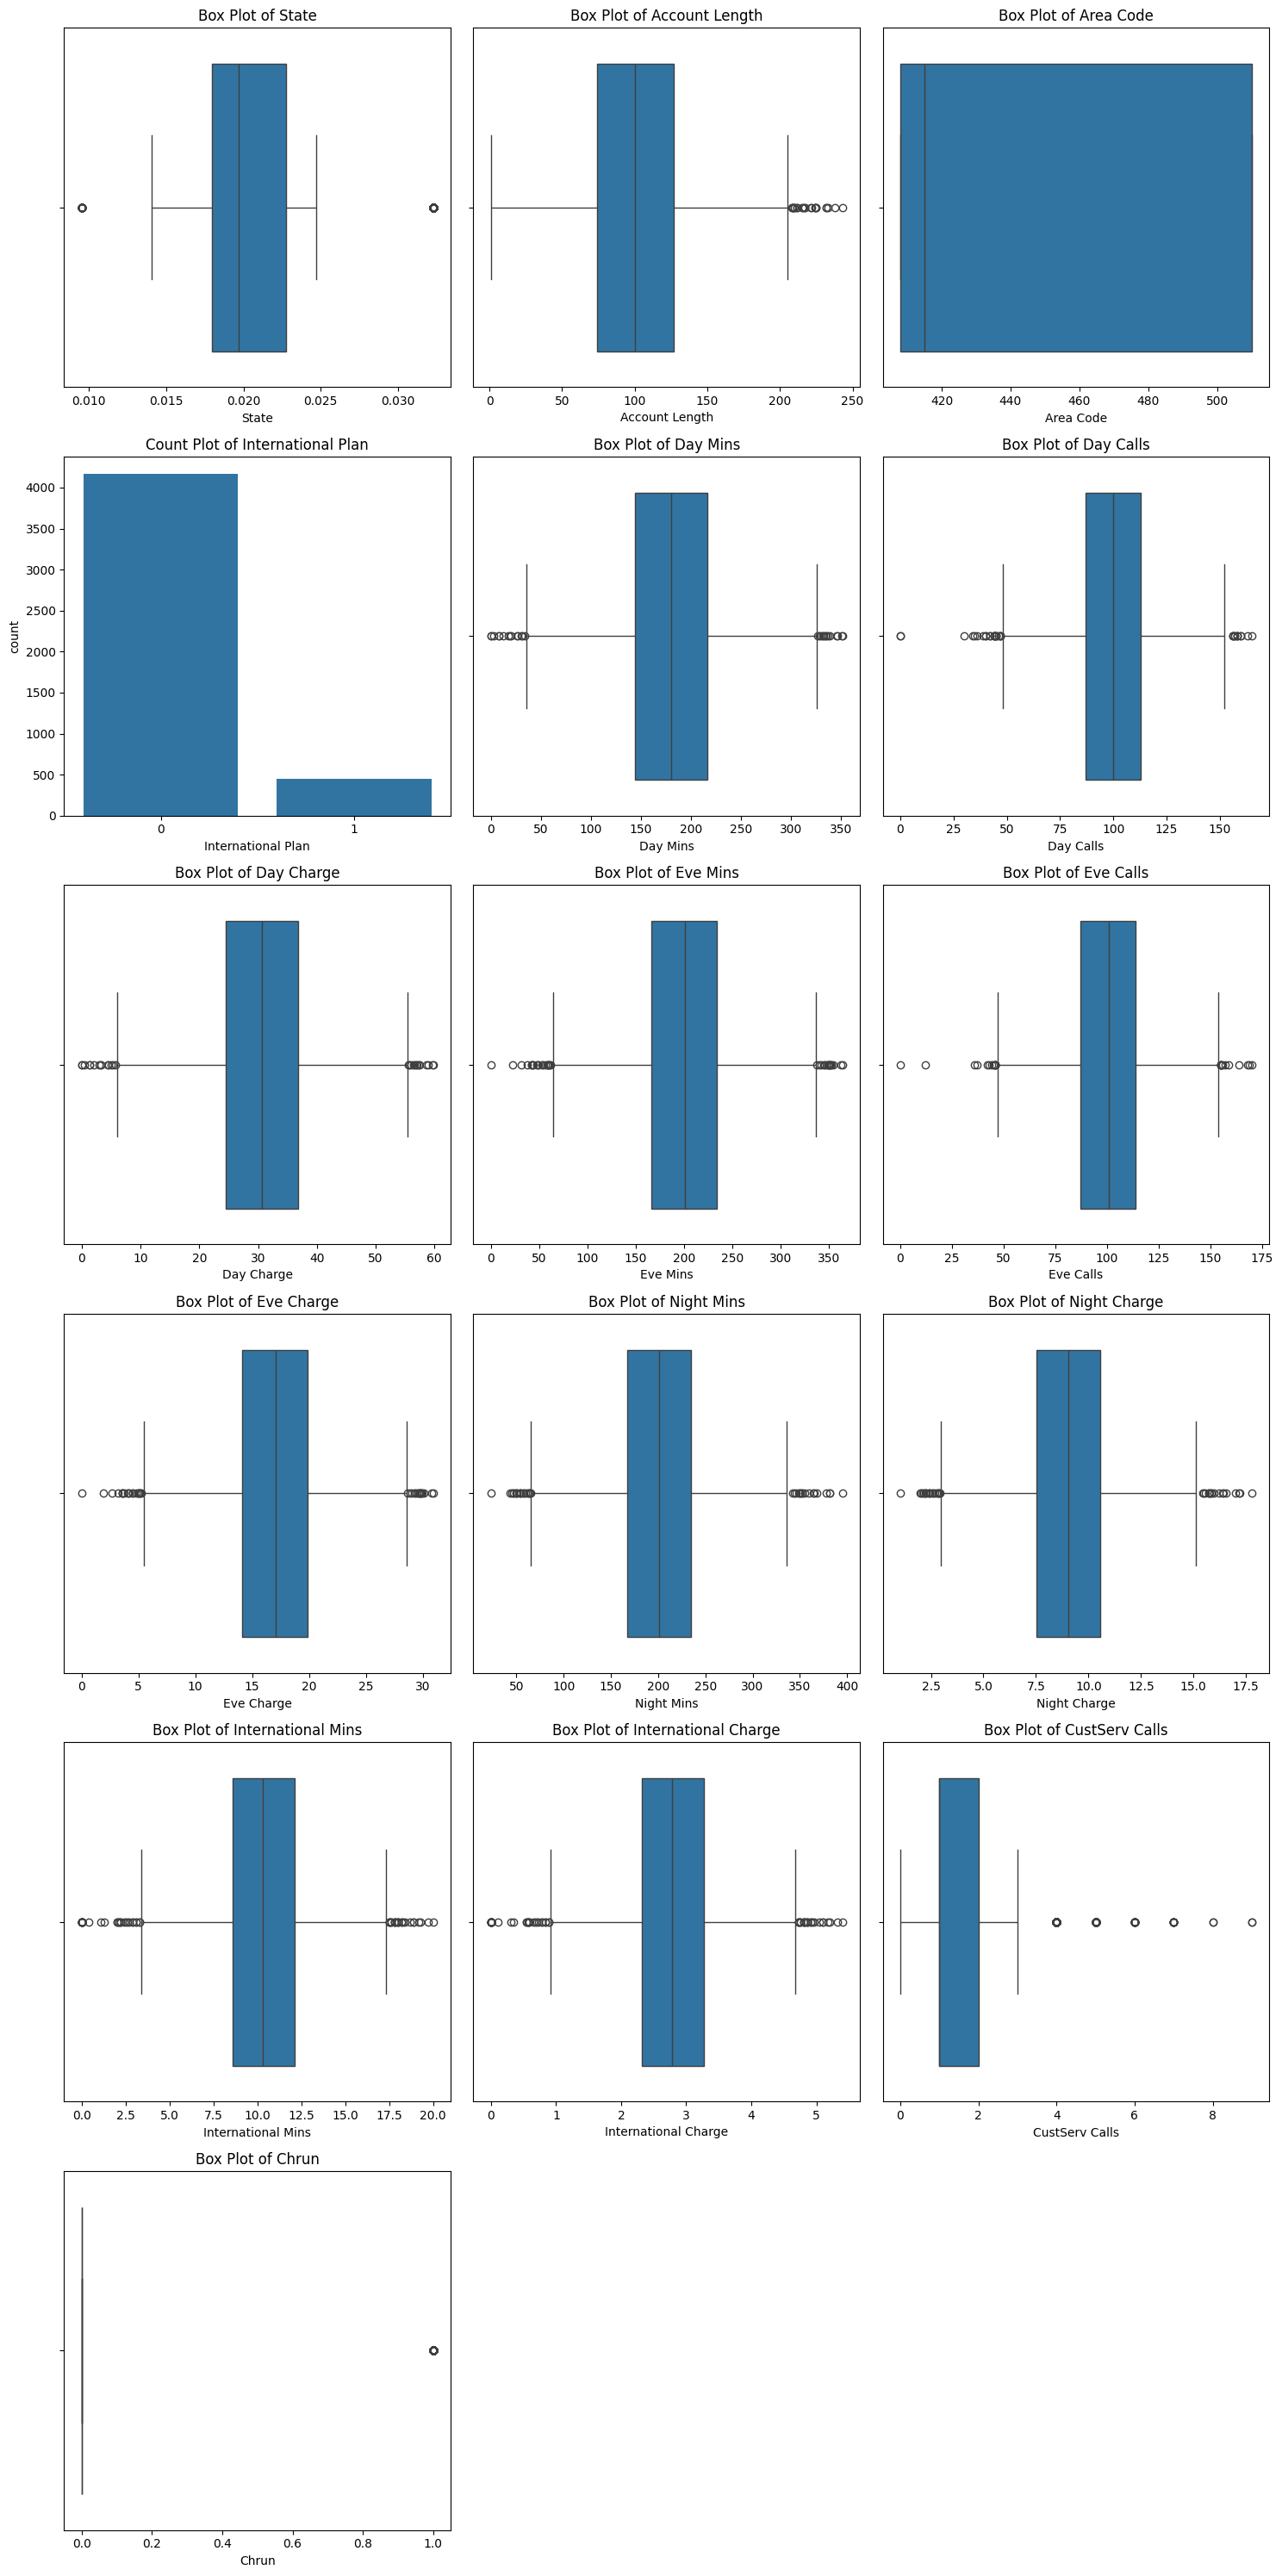

In [157]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the columns for which box plots need to be created
columns = [
    'State', 'Account Length', 'Area Code', 'International Plan',
    'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins', 'Eve Calls',
    'Eve Charge', 'Night Mins', 'Night Charge', 'International Mins',
    'International Charge', 'CustServ Calls', 'Chrun'
]

# Number of columns to display per row in the plot grid
columns_per_row = 3

# Calculate the number of rows needed
num_rows = (len(columns) + columns_per_row - 1) // columns_per_row

# Create a figure with subplots
plt.figure(figsize=(15, 5 * num_rows))

for i, col in enumerate(columns, 1):
    plt.subplot(num_rows, columns_per_row, i)
    # Plotting only numerical columns, skip non-numeric ones
    if data1[col].dtype in ['int64', 'float64']:
        sns.boxplot(x=data1[col])
    else:
        sns.countplot(x=data1[col])  # Use countplot for categorical variables
    plt.title(f'Box Plot of {col}' if data1[col].dtype in ['int64', 'float64'] else f'Count Plot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()


ValueError: Could not interpret value `Day Charge` for `x`. Value is a string, but `data` was not passed.

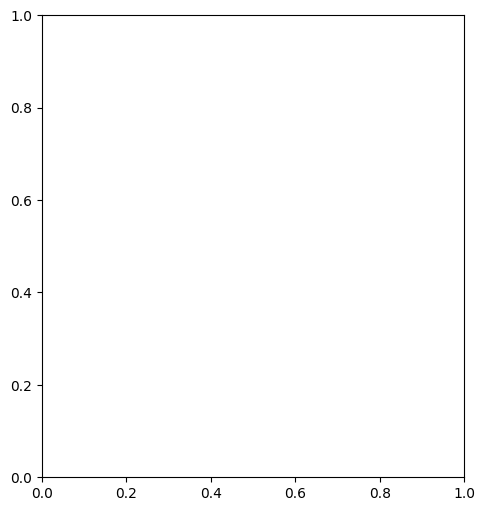

In [137]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Day Charge', data1=data1)
plt.title('Box Plot of Day Charge')

plt.subplot(1, 2, 2)
sns.boxplot(x='Day Mins', data1=data1)
plt.title('Box Plot of Day Mins')

plt.show()

# 2. Z-Score Method
def z_score_outliers(df):
    z_scores = (df - df.mean()) / df.std()
    outliers = df[abs(z_scores) > 3]
    return outliers

outliers_day_charge = z_score_outliers(data1['Day Charge'])
outliers_day_mins = z_score_outliers(data1['Day Mins'])

print("Outliers in Day Charge:", outliers_day_charge)
print("Outliers in Day Mins:", outliers_day_mins)

# 3. IQR Method
def iqr_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))]
    return outliers

outliers_day_charge_iqr = iqr_outliers(data1['Day Charge'])
outliers_day_mins_iqr = iqr_outliers(data1['Day Mins'])

print("Outliers in Day Charge (IQR):", outliers_day_charge_iqr)
print("Outliers in Day Mins (IQR):", outliers_day_mins_iqr)

In [125]:
# High-risk customers
high_risk_customers = X_test[X_test['CHURN-FLAG'] == 1]

print("Number of High-Risk Customers:", len(high_risk_customers))

# Save high-risk customers for targeted campaigns
high_risk_customers.to_csv("high_risk_customers_2nd_try.csv", index=False)


KeyError: 'CHURN-FLAG'

In [ ]:
# Group by segments to identify target actions
segment_analysis = high_risk_customers.groupby('Customer_Segment')['Churn_Risk_Score'].mean()

print(segment_analysis)

# Prioritize Customer Care for specific segments
priority_segments = segment_analysis[segment_analysis > 0.7].index.tolist()
print("Priority Segments:", priority_segments)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split data
X = data.drop(['CHURN-FLAG', 'Chrun'], axis=1)
y = data['CHURN-FLAG']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize numerical features for models like SVM and KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


ValueError: could not convert string to float: 'Low'